# Project guidance,

Please find below your Python Project Guidelines:

a. On Thursday, June 15th, each of you will get exactly 10 minutes to present their own project in person to the class. 

b. You can present in a PowerPoint presentation or Jupyter notebook.

c. I expect you to tell a story about your journey analyzing the data - do not show tables or code, just text and charts. 

d. In your presentation, please focus on three subjects: 

        1. The story of what you planned to analyze and what eventually happened. 
        2. Your biggest challenge (whether it was getting the data, cleaning the data, parsing the data, or finding insights). 
        3. A cool insight that you found. 
        4. How you would continue your work on this if you had more time. 
e. Like everything in life, your project doesn't have to be perfect, but you must have a project. So try to reach several insights as quickly as possible and only then work on final touch-ups. Focus on the story. A good analyst knows how to code, but a great analyst is a storyteller.
f. I'm available for any questions and support. :)


## About Dataset
Context
This dataset was collected to work on NBA games data. I used the nba stats website to create this dataset.

You can find more details about data collection in my GitHub repo here : nba predictor repo.

If you want more informations about this api endpoint feel free to go on the nba_api GitHub repo that documentate each endpoint : link here

Content
You can find 5 datasets :

games.csv : all games from 2004 season to last update with the date, teams and some details like number of points, etc.
games_details.csv : details of games dataset, all statistics of players for a given game
players.csv : players details (name)
ranking.csv : ranking of NBA given a day (split into west and east on CONFERENCE column
teams.csv : all teams of NBA
https://www.kaggle.com/datasets/nathanlauga/nba-games/code

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.animation as animation
from PIL import Image

Loading the tabels:

In [2]:
games = pd.read_csv('games.csv')

In [3]:
games_details = pd.read_csv('games_details.csv', low_memory=False)

In [4]:
df_teams = pd.read_csv('teams.csv')

In [5]:
games.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2022-12-22,22200477,Final,1610612740,1610612759,2022,1610612740,126.0,0.484,0.926,...,25.0,46.0,1610612759,117.0,0.478,0.815,0.321,23.0,44.0,1
1,2022-12-22,22200478,Final,1610612762,1610612764,2022,1610612762,120.0,0.488,0.952,...,16.0,40.0,1610612764,112.0,0.561,0.765,0.333,20.0,37.0,1
2,2022-12-21,22200466,Final,1610612739,1610612749,2022,1610612739,114.0,0.482,0.786,...,22.0,37.0,1610612749,106.0,0.470,0.682,0.433,20.0,46.0,1
3,2022-12-21,22200467,Final,1610612755,1610612765,2022,1610612755,113.0,0.441,0.909,...,27.0,49.0,1610612765,93.0,0.392,0.735,0.261,15.0,46.0,1
4,2022-12-21,22200468,Final,1610612737,1610612741,2022,1610612737,108.0,0.429,1.000,...,22.0,47.0,1610612741,110.0,0.500,0.773,0.292,20.0,47.0,0


In [6]:
games_details.head()

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,22200477,1610612759,SAS,San Antonio,1629641,Romeo Langford,Romeo,F,NaN,18:06,...,1.0,1.0,2.0,0.0,1.0,0.0,2.0,5.0,2.0,-2.0
1,22200477,1610612759,SAS,San Antonio,1631110,Jeremy Sochan,Jeremy,F,NaN,31:01,...,6.0,3.0,9.0,6.0,1.0,0.0,2.0,1.0,23.0,-14.0
2,22200477,1610612759,SAS,San Antonio,1627751,Jakob Poeltl,Jakob,C,NaN,21:42,...,1.0,3.0,4.0,1.0,1.0,0.0,2.0,4.0,13.0,-4.0
3,22200477,1610612759,SAS,San Antonio,1630170,Devin Vassell,Devin,G,NaN,30:20,...,0.0,9.0,9.0,5.0,3.0,0.0,2.0,1.0,10.0,-18.0
4,22200477,1610612759,SAS,San Antonio,1630200,Tre Jones,Tre,G,NaN,27:44,...,0.0,2.0,2.0,3.0,0.0,0.0,2.0,2.0,19.0,0.0


In [7]:
df_teams.head()

,LEAGUE_ID,TEAM_ID,MIN_YEAR,MAX_YEAR,ABBREVIATION,NICKNAME,YEARFOUNDED,CITY,ARENA,ARENACAPACITY,OWNER,GENERALMANAGER,HEADCOACH,DLEAGUEAFFILIATION
0,0,1610612737,1949,2019,ATL,Hawks,1949,Atlanta,State Farm Arena,18729.0,Tony Ressler,Travis Schlenk,Lloyd Pierce,Erie Bayhawks
1,0,1610612738,1946,2019,BOS,Celtics,1946,Boston,TD Garden,18624.0,Wyc Grousbeck,Danny Ainge,Brad Stevens,Maine Red Claws
2,0,1610612740,2002,2019,NOP,Pelicans,2002,New Orleans,Smoothie King Center,NaN,Tom Benson,Trajan Langdon,Alvin Gentry,No Affiliate
3,0,1610612741,1966,2019,CHI,Bulls,1966,Chicago,United Center,21711.0,Jerry Reinsdorf,Gar Forman,Jim Boylen,Windy City Bulls
4,0,1610612742,1980,2019,DAL,Mavericks,1980,Dallas,American Airlines Center,19200.0,Mark Cuban,Donnie Nelson,Rick Carlisle,Texas Legends


Joining the tables together :

In [8]:
df = pd.merge(games_details, games, on = 'GAME_ID', how = 'left')

In [9]:
df = pd.merge(df, df_teams, on = 'TEAM_ID', how = 'left')

In [10]:
list[df.columns]

list[Index(['GAME_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_CITY', 'PLAYER_ID',
       'PLAYER_NAME', 'NICKNAME_x', 'START_POSITION', 'COMMENT', 'MIN', 'FGM',
       'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT',
       'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TO', 'PF', 'PTS',
       'PLUS_MINUS', 'GAME_DATE_EST', 'GAME_STATUS_TEXT', 'HOME_TEAM_ID',
       'VISITOR_TEAM_ID', 'SEASON', 'TEAM_ID_home', 'PTS_home', 'FG_PCT_home',
       'FT_PCT_home', 'FG3_PCT_home', 'AST_home', 'REB_home', 'TEAM_ID_away',
       'PTS_away', 'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away', 'AST_away',
       'REB_away', 'HOME_TEAM_WINS', 'LEAGUE_ID', 'MIN_YEAR', 'MAX_YEAR',
       'ABBREVIATION', 'NICKNAME_y', 'YEARFOUNDED', 'CITY', 'ARENA',
       'ARENACAPACITY', 'OWNER', 'GENERALMANAGER', 'HEADCOACH',
       'DLEAGUEAFFILIATION'],
      dtype='object')]

 selecting the necessary columns:

In [11]:
df = df[['GAME_ID',
         'GAME_DATE_EST',
         'SEASON',
         'TEAM_ID',
         'TEAM_ABBREVIATION',
         'TEAM_CITY',
         'ABBREVIATION',
         'NICKNAME_y',
         'PLAYER_ID',
         'PLAYER_NAME',
         'FGM',
         'FGA',
         'FG_PCT',
         'FG3M',
         'FG3A',
         'FG3_PCT',
         'PTS',]]

In [12]:
df.head()

,GAME_ID,GAME_DATE_EST,SEASON,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,ABBREVIATION,NICKNAME_y,PLAYER_ID,PLAYER_NAME,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,PTS
0,22200477,2022-12-22,2022,1610612759,SAS,San Antonio,SAS,Spurs,1629641,Romeo Langford,1.0,1.0,1.000,0.0,0.0,0.000,2.0
1,22200477,2022-12-22,2022,1610612759,SAS,San Antonio,SAS,Spurs,1631110,Jeremy Sochan,7.0,14.0,0.500,2.0,4.0,0.500,23.0
2,22200477,2022-12-22,2022,1610612759,SAS,San Antonio,SAS,Spurs,1627751,Jakob Poeltl,6.0,9.0,0.667,0.0,0.0,0.000,13.0
3,22200477,2022-12-22,2022,1610612759,SAS,San Antonio,SAS,Spurs,1630170,Devin Vassell,4.0,13.0,0.308,1.0,6.0,0.167,10.0
4,22200477,2022-12-22,2022,1610612759,SAS,San Antonio,SAS,Spurs,1630200,Tre Jones,7.0,12.0,0.583,1.0,3.0,0.333,19.0


In [13]:
df.describe()

,GAME_ID,SEASON,TEAM_ID,PLAYER_ID,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,PTS
count,6.695600e+05,669560.000000,6.695600e+05,6.695600e+05,559678.000000,559678.000000,559678.000000,559678.000000,559678.000000,559678.000000,559678.000000
mean,2.171811e+07,2012.370682,1.610613e+09,4.024068e+05,3.588663,7.897341,0.416832,0.778616,2.187592,0.201109,9.688960
std,5.652361e+06,5.566771,8.652902e+00,7.220687e+06,3.030509,5.677436,0.251894,1.227853,2.570787,0.289685,8.082352
min,1.030000e+07,2003.000000,1.610613e+09,1.500000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.070004e+07,2008.000000,1.610613e+09,2.470000e+03,1.000000,3.000000,0.267000,0.000000,0.000000,0.000000,3.000000
50%,2.120098e+07,2013.000000,1.610613e+09,2.011870e+05,3.000000,7.000000,0.429000,0.000000,1.000000,0.000000,8.000000
75%,2.180017e+07,2017.000000,1.610613e+09,2.034730e+05,5.000000,11.000000,0.571000,1.000000,4.000000,0.400000,14.000000
max,5.210021e+07,2022.000000,1.610613e+09,1.962938e+09,28.000000,50.000000,1.000000,14.000000,24.000000,1.000000,81.000000


dealing with the date:

In [14]:
df['GAME_DATE_EST']

0         2022-12-22
1         2022-12-22
2         2022-12-22
3         2022-12-22
4         2022-12-22
             ...    
669555    2012-10-06
669556    2012-10-06
669557    2012-10-06
669558    2012-10-06
669559    2012-10-06
Name: GAME_DATE_EST, Length: 669560, dtype: object

In [15]:
df['dt'] = pd.to_datetime(df['GAME_DATE_EST'], dayfirst=True)

In [16]:
df[['GAME_DATE_EST', 'dt']].head(30)

,GAME_DATE_EST,dt
0,2022-12-22,2022-12-22
1,2022-12-22,2022-12-22
2,2022-12-22,2022-12-22
3,2022-12-22,2022-12-22
4,2022-12-22,2022-12-22
5,2022-12-22,2022-12-22
6,2022-12-22,2022-12-22
7,2022-12-22,2022-12-22
8,2022-12-22,2022-12-22
9,2022-12-22,2022-12-22


In [17]:
print(df['dt'].max())
print(df['dt'].min())

2022-12-22 00:00:00
2003-10-05 00:00:00


In [18]:
df['year'] = df['dt'].dt.year
df['month'] = df['dt'].dt.month
df['day'] = df['dt'].dt.day

Checking the difference between season and year. It's similar but not exactly the same:

In [19]:
df[['SEASON', 'year']].sample(15)

,SEASON,year
272093,2004,2004
556036,2015,2015
63588,2020,2021
95876,2019,2020
392060,2009,2009
474175,2017,2017
9482,2022,2022
126746,2008,2009
399821,2009,2009
239705,2005,2005


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 669560 entries, 0 to 669559
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   GAME_ID            669560 non-null  int64         
 1   GAME_DATE_EST      669560 non-null  object        
 2   SEASON             669560 non-null  int64         
 3   TEAM_ID            669560 non-null  int64         
 4   TEAM_ABBREVIATION  669560 non-null  object        
 5   TEAM_CITY          669560 non-null  object        
 6   ABBREVIATION       669560 non-null  object        
 7   NICKNAME_y         669560 non-null  object        
 8   PLAYER_ID          669560 non-null  int64         
 9   PLAYER_NAME        669560 non-null  object        
 10  FGM                559678 non-null  float64       
 11  FGA                559678 non-null  float64       
 12  FG_PCT             559678 non-null  float64       
 13  FG3M               559678 non-null  float64 

OK I think we are good. Let's start analyzing the data.
We would like to analize the 3 point evolution over the years in the dataset:

In [21]:
df_3p = df.groupby('year').agg(total_FGA = ('FGA', 'sum'),
                                            total_FG3A = ('FG3A', 'sum'))
df_3p

,total_FGA,total_FG3A
year,,
2003,74297.0,13557.0
2004,205716.0,39004.0
2005,228262.0,45182.0
2006,228832.0,47688.0
2007,224763.0,48790.0
2008,233246.0,51755.0
2009,230754.0,51640.0
2010,231863.0,52335.0
2011,148134.0,32903.0


In [22]:
df_3p['pct_3p'] =df_3p['total_FG3A']/ df_3p['total_FGA'] #finding the 3 point percentage attempts out of total shots for each year
df_3p

,total_FGA,total_FG3A,pct_3p
year,,,
2003,74297.0,13557.0,0.182470
2004,205716.0,39004.0,0.189601
2005,228262.0,45182.0,0.197939
2006,228832.0,47688.0,0.208397
2007,224763.0,48790.0,0.217073
2008,233246.0,51755.0,0.221890
2009,230754.0,51640.0,0.223788
2010,231863.0,52335.0,0.225715
2011,148134.0,32903.0,0.222116


Text(0.5, 1.0, '% 3 Point Attempts Out Of Total Shots')

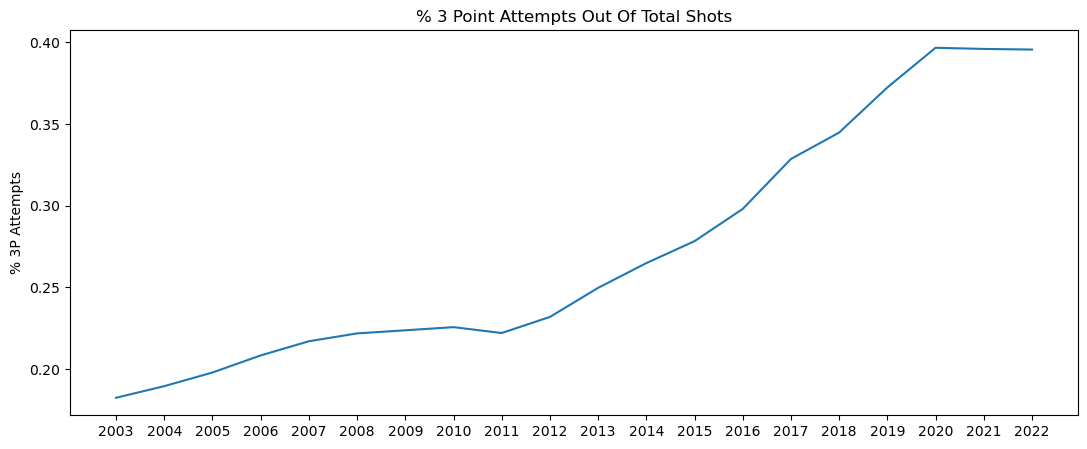

In [23]:
fig = plt.figure(figsize=(13, 5))
# Creating a line plot
plt.plot(df_3p.index, df_3p['pct_3p'])
plt.xticks(df_3p.index)
plt.ylabel('% 3P Attempts')
plt.title('% 3 Point Attempts Out Of Total Shots')

The trend is clearly shown in this plot. Teams shoot more 3-pointers out of their total shots as the years go by.

Let's break it down to teams:

In [24]:
df_3p = df.groupby(['year', 'ABBREVIATION']).agg(total_FGA = ('FGA', 'sum'),
                                                total_FG3A = ('FG3A', 'sum'))
df_3p

total_FGA  total_FG3A
year ABBREVIATION                       
2003 ATL              2699.0       426.0
     BKN              2476.0       391.0
     BOS              2654.0       638.0
     CHI              2575.0       449.0
     CLE              2737.0       337.0
...                      ...         ...
2022 SAC              6900.0      2747.0
     SAS              7772.0      2842.0
     TOR              8451.0      3100.0
     UTA              8015.0      3579.0
     WAS              7271.0      2620.0

[599 rows x 2 columns]

In [25]:
df_3p = df_3p.reset_index()

In [26]:
df_3p['pct_3p'] =df_3p['total_FG3A']/ df_3p['total_FGA']

In [27]:
df_3p.head()

,year,ABBREVIATION,total_FGA,total_FG3A,pct_3p
0,2003,ATL,2699.0,426.0,0.157836
1,2003,BKN,2476.0,391.0,0.157916
2,2003,BOS,2654.0,638.0,0.240392
3,2003,CHI,2575.0,449.0,0.174369
4,2003,CLE,2737.0,337.0,0.123128


I would like to add the appropriate color for every team. 

In [28]:
team_color_mapping = { #creating a dictionery for each team and their main color
    'ATL': 'red',
    'BOS': 'green',
    'BKN': 'black',
    'CHA': 'teal',
    'CHI': 'red',
    'CLE': 'red',
    'DAL': 'blue',
    'DEN': 'navy',
    'DET': 'blue',
    'GSW': 'yellow',
    'HOU': 'red',
    'IND': 'navy',
    'LAC': 'red',
    'LAL': 'purple',
    'MEM': 'navy',
    'MIA': 'red',
    'MIL': 'green',
    'MIN': 'blue',
    'NOP': 'navy',
    'NYK': 'blue',
    'OKC': 'blue',
    'ORL': 'blue',
    'PHI': 'blue',
    'PHX': 'purple',
    'POR': 'black',
    'SAC': 'purple',
    'SAS': 'grey',
    'TOR': 'red',
    'UTA': 'navy',
    'WAS': 'red'
}


In [29]:
df['color'] = df['ABBREVIATION'].map(team_color_mapping) #adding the colors to the main table

In [30]:
df_3p['color'] = df_3p['ABBREVIATION'].map(team_color_mapping)#adding the colors to the grouped table

In [31]:
df_3p.head()

,year,ABBREVIATION,total_FGA,total_FG3A,pct_3p,color
0,2003,ATL,2699.0,426.0,0.157836,red
1,2003,BKN,2476.0,391.0,0.157916,black
2,2003,BOS,2654.0,638.0,0.240392,green
3,2003,CHI,2575.0,449.0,0.174369,red
4,2003,CLE,2737.0,337.0,0.123128,red


In [32]:
teams = list(df['ABBREVIATION'].unique())#creating a list of teams
teams

['SAS',
 'NOP',
 'WAS',
 'UTA',
 'MIL',
 'CLE',
 'DET',
 'PHI',
 'CHI',
 'ATL',
 'IND',
 'BOS',
 'GSW',
 'BKN',
 'TOR',
 'NYK',
 'ORL',
 'HOU',
 'DAL',
 'MIN',
 'POR',
 'OKC',
 'LAL',
 'SAC',
 'CHA',
 'LAC',
 'MIA',
 'PHX',
 'MEM',
 'DEN']

And creating the plot:

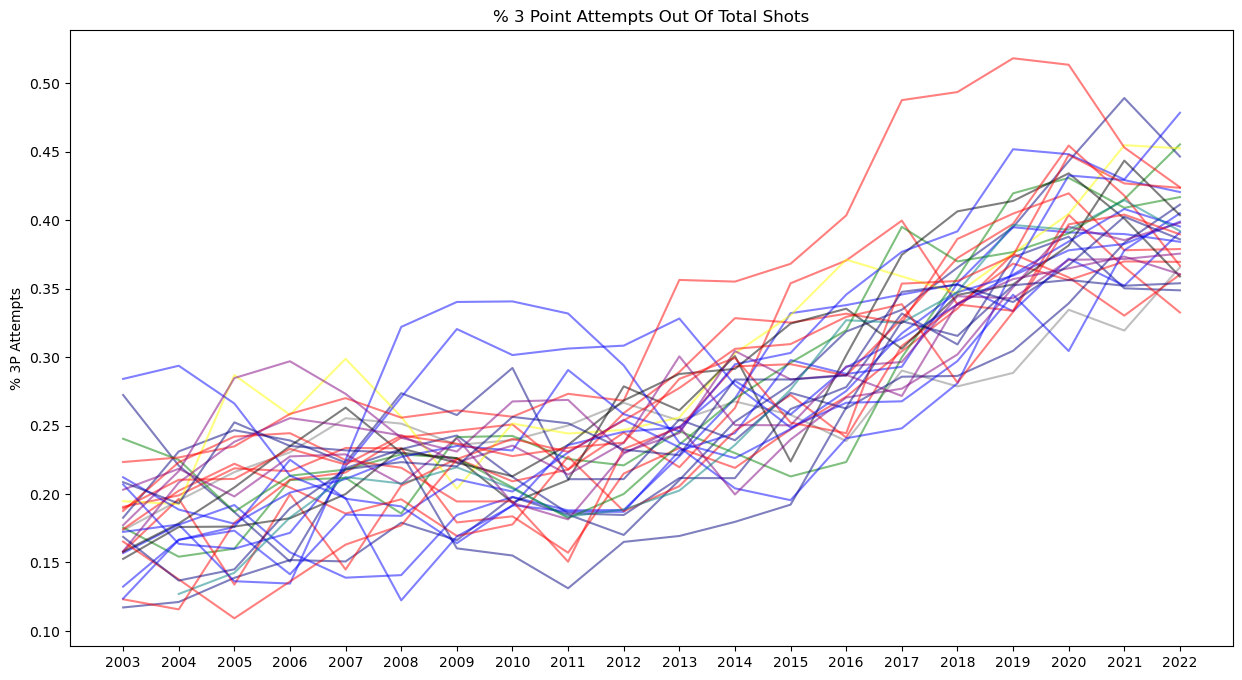

In [33]:
fig = plt.figure(figsize=(15, 8))
for team in teams:
    df_filtered = df_3p[df_3p['ABBREVIATION'] == team]
    plt.plot(df_filtered['year'], df_filtered['pct_3p'], c= team_color_mapping[team], alpha = 0.5 )
    plt.xticks(df_filtered['year'])
plt.ylabel('% 3P Attempts')
plt.title('% 3 Point Attempts Out Of Total Shots')
plt.show()

Interesting. Let's focus on the most radical teams like the blue and the red one's.

Let's see who is the blue team that started to shoot a lot of threes in 2007:

In [34]:
df_2009 = df_3p[df_3p['year']== 2009]

In [35]:
df_2009.sort_values("pct_3p", ascending= False).head(1)

,year,ABBREVIATION,total_FGA,total_FG3A,pct_3p,color
200,2009,ORL,8698.0,2960.0,0.340308,blue


Its the orlando magic! what can be the reason for that?

Here is an example of the Orlando Magic roster from 2006 to 2013:

2006-2007 Orlando Magic Roster:
- Dwight Howard
- Jameer Nelson
- Hedo Turkoglu
- Rashard Lewis
- Grant Hill
- Keyon Dooling
- Tony Battie
- Darko Milicic
- Carlos Arroyo
- Trevor Ariza
- Bo Outlaw
- J.J. Redick

2007-2008 Orlando Magic Roster:
- Dwight Howard
- Jameer Nelson
- Hedo Turkoglu
- Rashard Lewis
- Mickael Pietrus
- Keyon Dooling
- Tony Battie
- Marcin Gortat
- Keith Bogans
- J.J. Redick
- Adonal Foyle

2008-2009 Orlando Magic Roster:
- Dwight Howard
- Jameer Nelson
- Hedo Turkoglu
- Rashard Lewis
- Mickael Pietrus
- Courtney Lee
- Tony Battie
- Marcin Gortat
- Rafer Alston
- J.J. Redick
- Anthony Johnson

2009-2010 Orlando Magic Roster:
- Dwight Howard
- Jameer Nelson
- Vince Carter
- Rashard Lewis
- Mickael Pietrus
- Matt Barnes
- Brandon Bass
- Marcin Gortat
- J.J. Redick
- Ryan Anderson
- Anthony Johnson

2010-2011 Orlando Magic Roster:
- Dwight Howard
- Jameer Nelson
- Jason Richardson
- Hedo Turkoglu
- Ryan Anderson
- J.J. Redick
- Brandon Bass
- Gilbert Arenas
- Quentin Richardson
- Chris Duhon

2011-2012 Orlando Magic Roster:
- Dwight Howard
- Jameer Nelson
- Jason Richardson
- Hedo Turkoglu
- Ryan Anderson
- J.J. Redick
- Glen Davis
- Chris Duhon
- Quentin Richardson
- Earl Clark
- Von Wafer

2012-2013 Orlando Magic Roster:
- Jameer Nelson
- Arron Afflalo
- Nikola Vucevic
- Glen Davis
- Maurice Harkless
- J.J. Redick
- Andrew Nicholson
- E'Twaun Moore
- Tobias Harris
- Kyle O'Quinn
- Al Harrington

Please note that roster compositions can change over time due to trades, injuries, and other factors. The above list provides a general idea of the players who were part of the Orlando Magic roster during that period, but it may not include all players who played for the team during those years.

And who is the red team?

In [36]:
df_2019 = df_3p[df_3p['year']== 2019]
df_2019.sort_values("pct_3p", ascending= False).head(1)

,year,ABBREVIATION,total_FGA,total_FG3A,pct_3p,color
489,2019,HOU,8572.0,4443.0,0.518315,red


I'ts Houson Rockets.

These 2 teams had a huge impact on the development of three-pointers in the NBA.

In [37]:
df_2011 = df_3p[df_3p['year']== 2011]
df_2011.sort_values("pct_3p", ascending= True).head(1)

,year,ABBREVIATION,total_FGA,total_FG3A,pct_3p,color
253,2011,MEM,5611.0,736.0,0.131171,navy


The Memphis Grizzlies were the team that made the fewest 3-pointers in 2009-2015

Let's see them clearly now:

In [38]:
radical_teams = ['MEM', 'HOU','ORL']

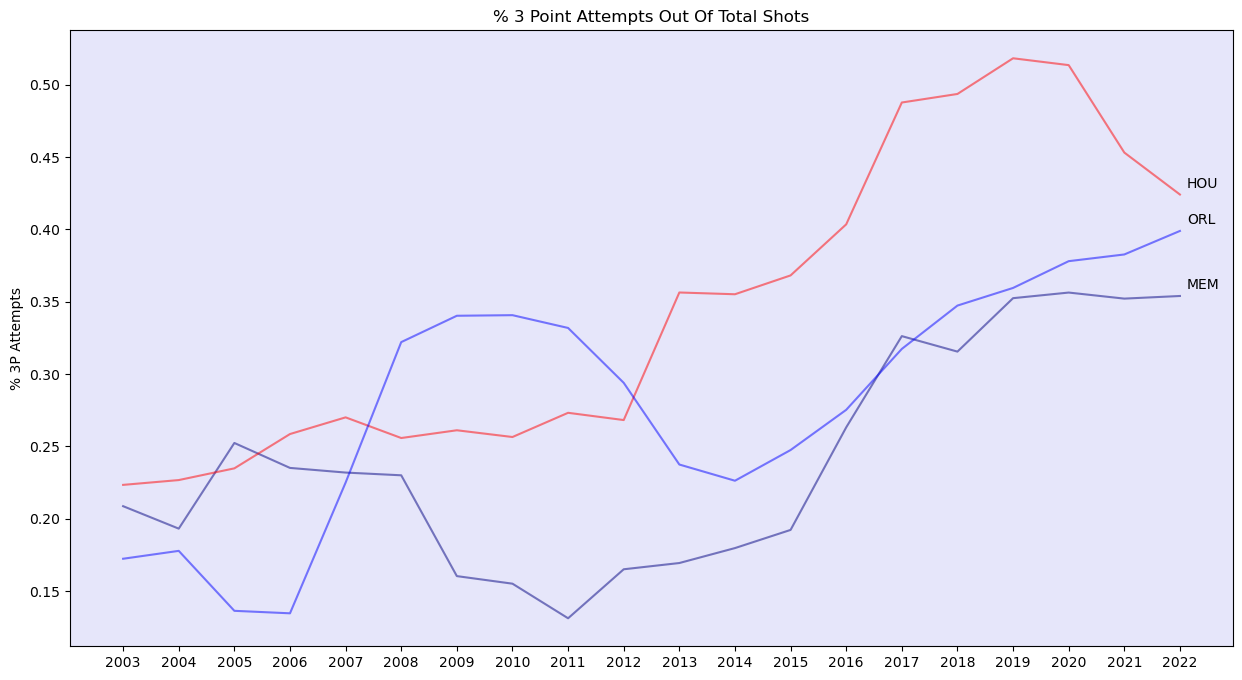

In [39]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111)  # Create an axes object

# Iterate over teams and plot data
for team in radical_teams:
    df_filtered = df_3p[df_3p['ABBREVIATION'] == team]
    ax.plot(df_filtered['year'], df_filtered['pct_3p'], c=team_color_mapping[team], alpha=0.5)
    ax.set_xticks(df_filtered['year'])  # Set x-axis ticks

    # Add annotation near the line
    x_pos = df_filtered['year'].iloc[-1]  # X-coordinate of the annotation
    y_pos = df_filtered['pct_3p'].iloc[-1]  # Y-coordinate of the annotation
    ax.annotate(team, xy=(x_pos, y_pos), xytext=(5, 5), textcoords='offset points')

ax.set_ylabel('% 3P Attempts')
ax.set_title('% 3 Point Attempts Out Of Total Shots')

# Set the background color
ax.set_facecolor('lavender')  # Specify the color you want

plt.show()


I would like to make a scatter plot that shows the difference between shots for 2 and shots for 3 for every team:

In [42]:
 df_teams_FG = df.groupby('TEAM_CITY').agg(total_FGA = ('FGA', 'sum'),
                                                 total_FG3A = ('FG3A', 'sum'))
df_teams_FG

,total_FGA,total_FG3A
TEAM_CITY,,
Atlanta,147488.0,41673.0
Boston,154402.0,44786.0
Brooklyn,80017.0,27528.0
Charlotte,133548.0,35866.0
Chicago,148032.0,36961.0
Cleveland,149092.0,41927.0
Dallas,151122.0,45521.0
Denver,150940.0,40946.0
Detroit,147434.0,37778.0


In [43]:
len(df_teams_FG)

33

Too many teams. There is only 30 teams in the NBA. We should use ABBREVIATION and not TEAM_CITY.

In [47]:
len(df_teams)

30

In [48]:
list(df_teams.columns)

['LEAGUE_ID',
 'TEAM_ID',
 'MIN_YEAR',
 'MAX_YEAR',
 'ABBREVIATION',
 'NICKNAME',
 'YEARFOUNDED',
 'CITY',
 'ARENA',
 'ARENACAPACITY',
 'OWNER',
 'GENERALMANAGER',
 'HEADCOACH',
 'DLEAGUEAFFILIATION']

In [50]:
 df_teams_FG = df.groupby('ABBREVIATION').agg(total_FGA = ('FGA', 'sum'),
                                             total_FG3A = ('FG3A', 'sum'),
                                              n_games = ('GAME_ID', 'nunique'))
df_teams_FG

,total_FGA,total_FG3A,n_games
ABBREVIATION,,,
ATL,147488.0,41673.0,1778
BKN,143547.0,41568.0,1746
BOS,154402.0,44786.0,1878
CHA,133548.0,35866.0,1601
CHI,148032.0,36961.0,1761
CLE,149092.0,41927.0,1809
DAL,151122.0,45521.0,1816
DEN,150940.0,40946.0,1782
DET,147434.0,37778.0,1780


In [51]:
len(df_teams_FG)

30

Great.

In [53]:
df_teams_FG['total_FG2A'] = df_teams_FG['total_FGA'] - df_teams_FG['total_FG3A'] #finding the total shots for 2 point
df_teams_FG.head()

,total_FGA,total_FG3A,n_games,total_FG2A
ABBREVIATION,,,,
ATL,147488.0,41673.0,1778,105815.0
BKN,143547.0,41568.0,1746,101979.0
BOS,154402.0,44786.0,1878,109616.0
CHA,133548.0,35866.0,1601,97682.0
CHI,148032.0,36961.0,1761,111071.0


In [56]:
df_teams_FG['avg_FG2A'] = df_teams_FG['total_FG2A']/df_teams_FG['n_games']  # finding the average shots per game
df_teams_FG['avg_FG3A'] = df_teams_FG['total_FG3A']/df_teams_FG['n_games']  
df_teams_FG.head()

,total_FGA,total_FG3A,n_games,total_FG2A,avg_FG2A,avg_FG3A
ABBREVIATION,,,,,,
ATL,147488.0,41673.0,1778,105815.0,59.513498,23.438133
BKN,143547.0,41568.0,1746,101979.0,58.407216,23.807560
BOS,154402.0,44786.0,1878,109616.0,58.368477,23.847710
CHA,133548.0,35866.0,1601,97682.0,61.013117,22.402249
CHI,148032.0,36961.0,1761,111071.0,63.072686,20.988643


In [58]:
df_teams_FG = df_teams_FG.reset_index()

In [61]:
df_teams_FG['color'] = df_teams_FG['ABBREVIATION'].map(team_color_mapping) #adding the color for each team

In [62]:
df_teams_FG.head()

,ABBREVIATION,total_FGA,total_FG3A,n_games,total_FG2A,avg_FG2A,avg_FG3A,color
0,ATL,147488.0,41673.0,1778,105815.0,59.513498,23.438133,red
1,BKN,143547.0,41568.0,1746,101979.0,58.407216,23.807560,black
2,BOS,154402.0,44786.0,1878,109616.0,58.368477,23.847710,green
3,CHA,133548.0,35866.0,1601,97682.0,61.013117,22.402249,teal
4,CHI,148032.0,36961.0,1761,111071.0,63.072686,20.988643,red


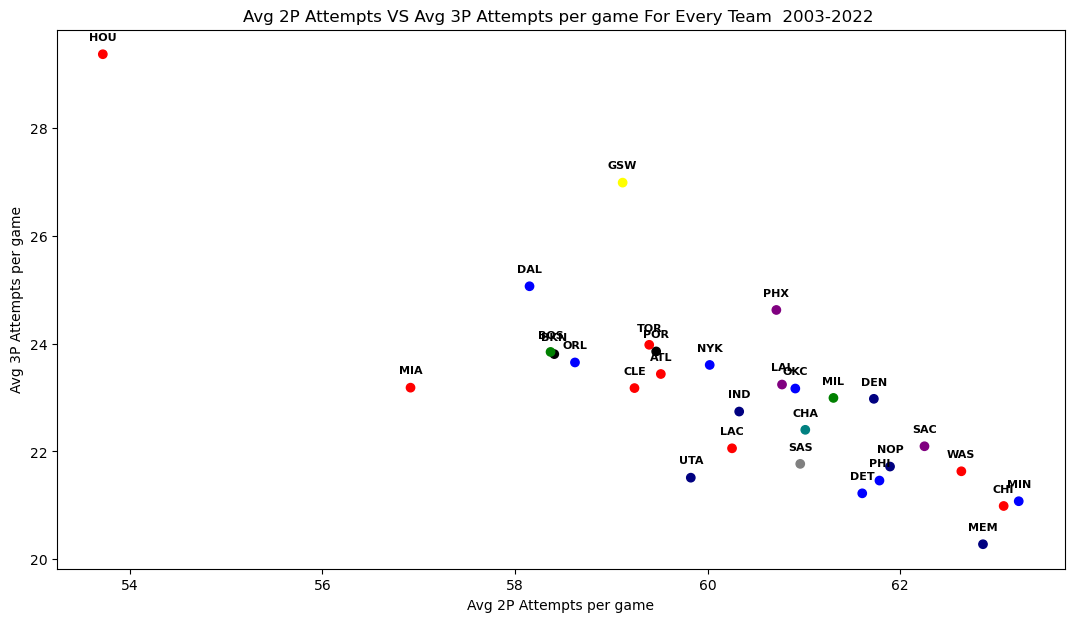

In [64]:
fig = plt.figure(figsize=(13, 7))
plt.scatter(df_teams_FG['avg_FG2A'], df_teams_FG['avg_FG3A'], c = df_teams_FG['color']) #and creating the plot
plt.xlabel('Avg 2P Attempts per game')
plt.ylabel('Avg 3P Attempts per game')
plt.title('Avg 2P Attempts VS Avg 3P Attempts per game For Every Team  2003-2022 ')
for i, abbreviation in enumerate(df_teams_FG['ABBREVIATION']):
    plt.annotate(abbreviation, (df_teams_FG['avg_FG2A'][i], df_teams_FG['avg_FG3A'][i]),
                 textcoords="offset points", xytext=(0,10),
                 ha='center', fontsize=8, fontweight='bold')

Breaking it down to seasons:

In [78]:
 df_teams_years = df.groupby(['ABBREVIATION', 'SEASON']).agg(total_FGA = ('FGA', 'sum'),
                                                             total_FG3A = ('FG3A', 'sum'),
                                                             n_games = ('GAME_ID', 'nunique'))
df_teams_years.sample(5)

,,total_FGA,total_FG3A,n_games
ABBREVIATION,SEASON,,,
ORL,2018,8072.0,2913.0,91
SAC,2004,7699.0,1557.0,91
GSW,2015,9763.0,3536.0,113
ORL,2015,7734.0,2000.0,89
BOS,2010,7473.0,1367.0,99


In [79]:
df_teams_years['total_FG2A'] = df_teams_years['total_FGA'] - df_teams_years['total_FG3A']
df_teams_years.head()

total_FGA  total_FG3A  n_games  total_FG2A
ABBREVIATION SEASON                                            
ATL          2003       6609.0      1256.0       83      5353.0
             2004       6821.0       997.0       84      5824.0
             2005       6997.0      1205.0       89      5792.0
             2006       6986.0      1161.0       90      5825.0
             2007       7668.0      1250.0       97      6418.0

In [80]:
df_teams_years.reset_index(inplace=True) #reseting the indexes to make it more comfortable to work


In [81]:
df_teams_years['color'] = df_teams_years['ABBREVIATION'].map(team_color_mapping)
df_teams_years.sample(10)

,ABBREVIATION,SEASON,total_FGA,total_FG3A,n_games,total_FG2A,color
302,MIA,2006,7084.0,1734.0,93,5350.0,red
476,PHX,2020,8963.0,3470.0,98,5493.0,purple
284,MEM,2008,6938.0,1233.0,90,5705.0,navy
30,BKN,2013,7827.0,2359.0,101,5468.0,black
448,PHI,2012,7478.0,1576.0,89,5902.0,blue
542,TOR,2006,7564.0,1706.0,95,5858.0,red
105,CLE,2009,7746.0,1930.0,100,5816.0,red
426,ORL,2010,7386.0,2426.0,95,4960.0,blue
273,LAL,2017,7741.0,2535.0,88,5206.0,purple
263,LAL,2007,8936.0,2261.0,109,6675.0,purple


In [83]:
df_teams_years['avg_FG2A'] = df_teams_years['total_FG2A']/df_teams_years['n_games']  
df_teams_years['avg_FG3A'] = df_teams_years['total_FG3A']/df_teams_years['n_games']  
df_teams_years.head()

,ABBREVIATION,SEASON,total_FGA,total_FG3A,n_games,total_FG2A,color,avg_FG2A,avg_FG3A
0,ATL,2003,6609.0,1256.0,83,5353.0,red,64.493976,15.132530
1,ATL,2004,6821.0,997.0,84,5824.0,red,69.333333,11.869048
2,ATL,2005,6997.0,1205.0,89,5792.0,red,65.078652,13.539326
3,ATL,2006,6986.0,1161.0,90,5825.0,red,64.722222,12.900000
4,ATL,2007,7668.0,1250.0,97,6418.0,red,66.164948,12.886598


In [84]:
years = list(df_teams_years['SEASON'].unique()) #creating a list of the seasons
years

[2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021,
 2022]

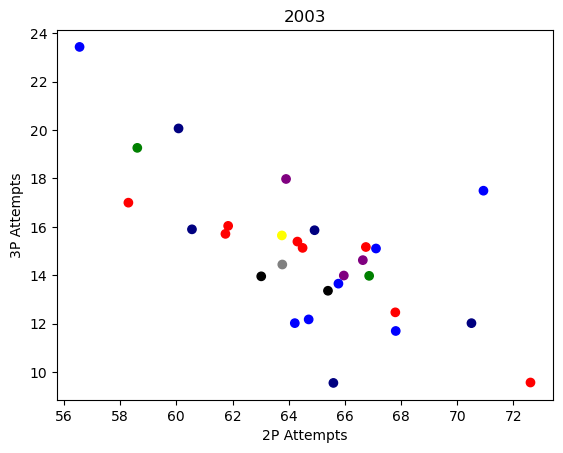

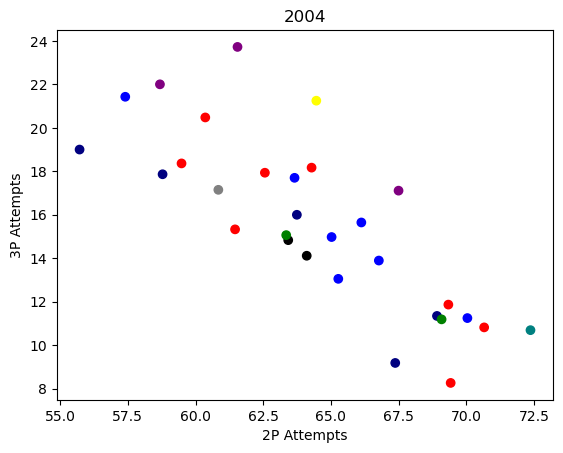

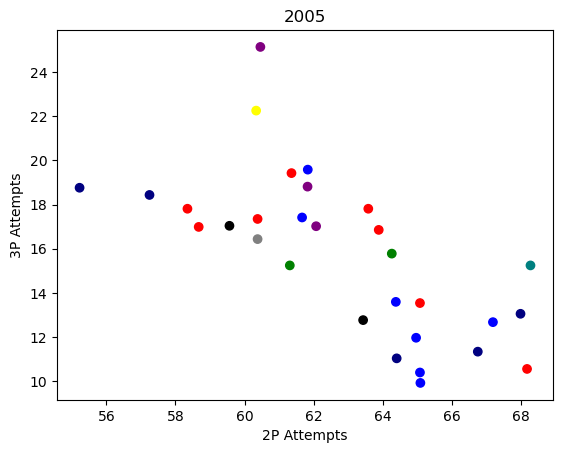

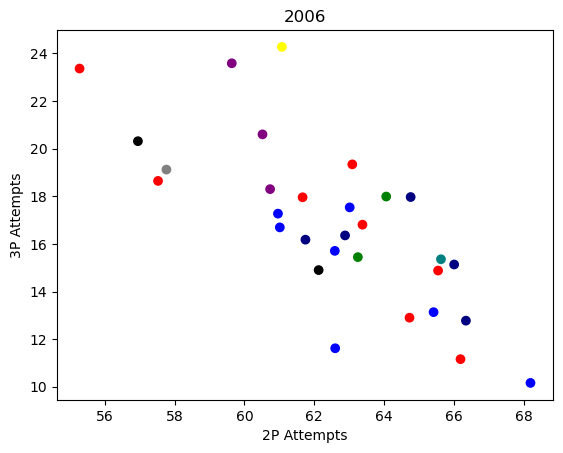

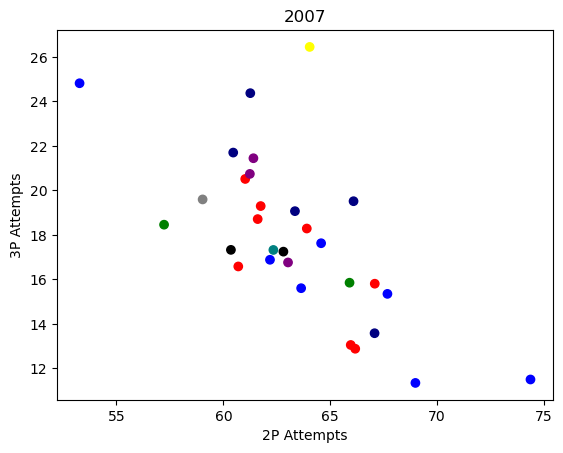

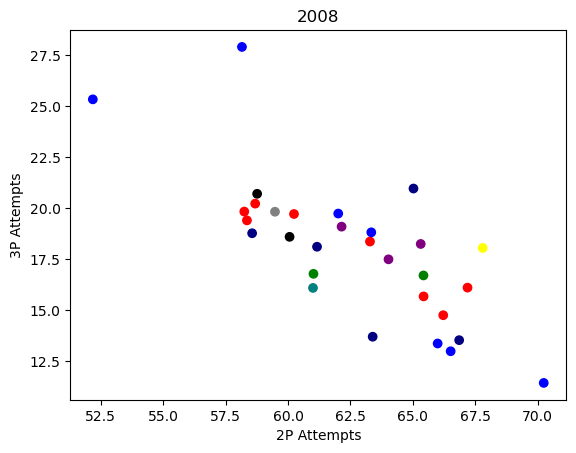

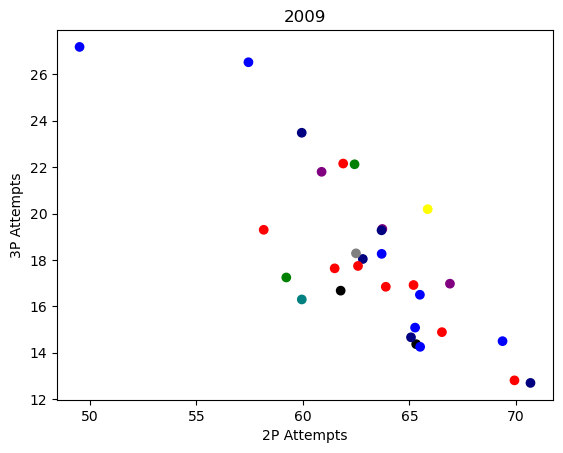

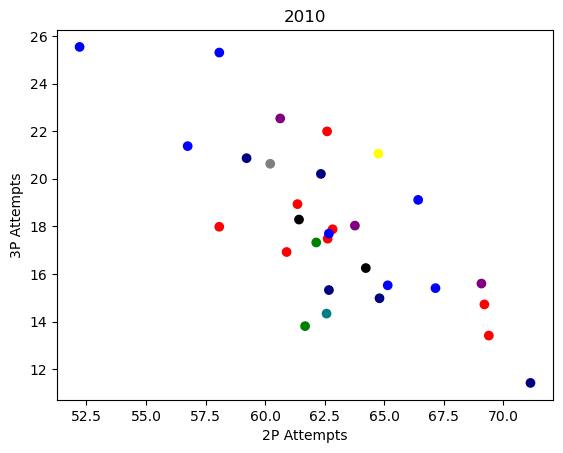

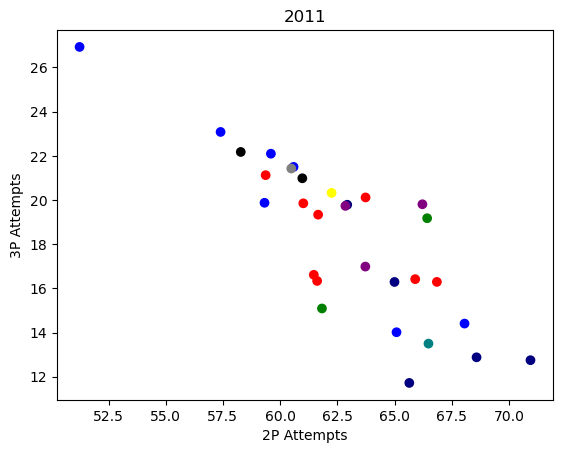

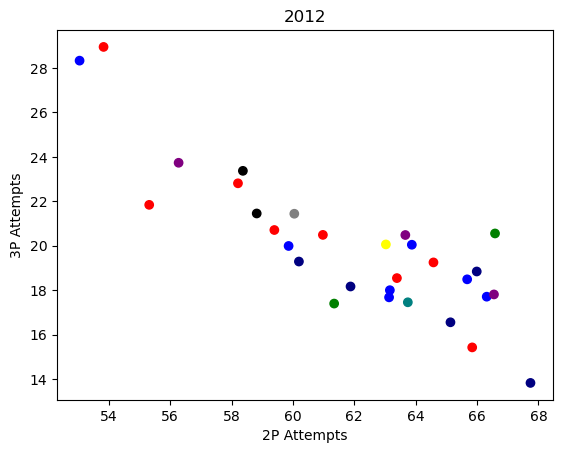

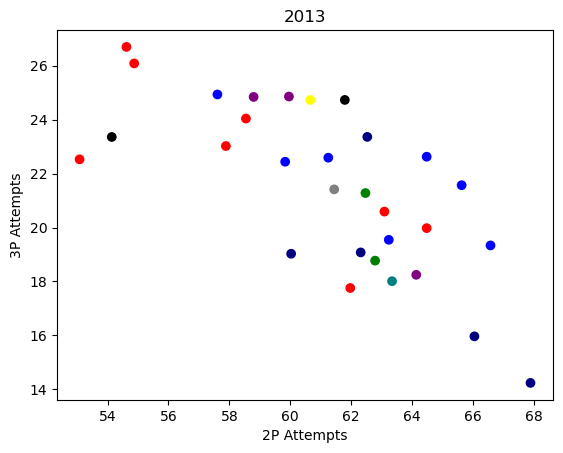

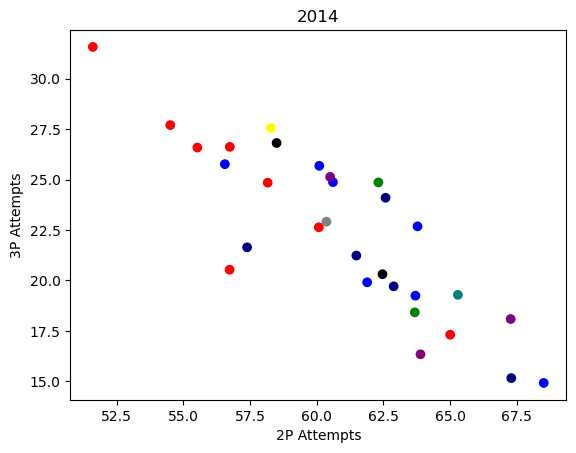

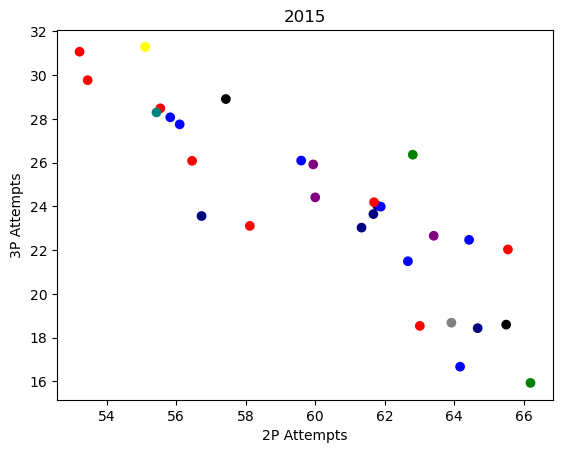

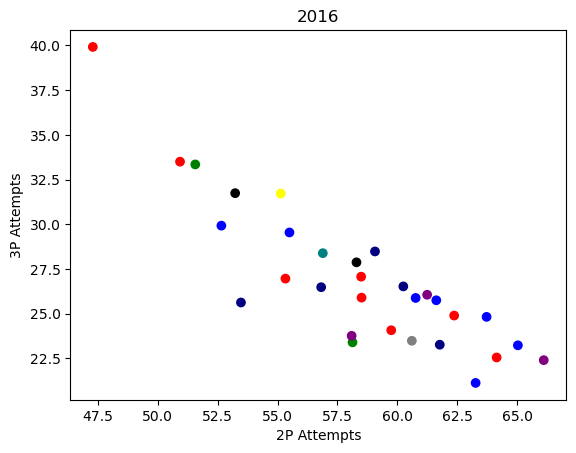

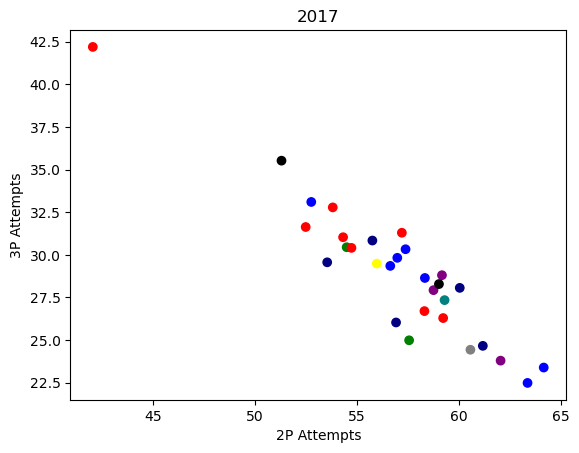

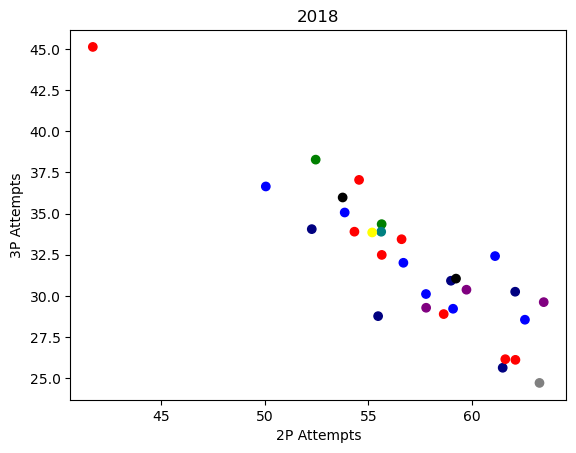

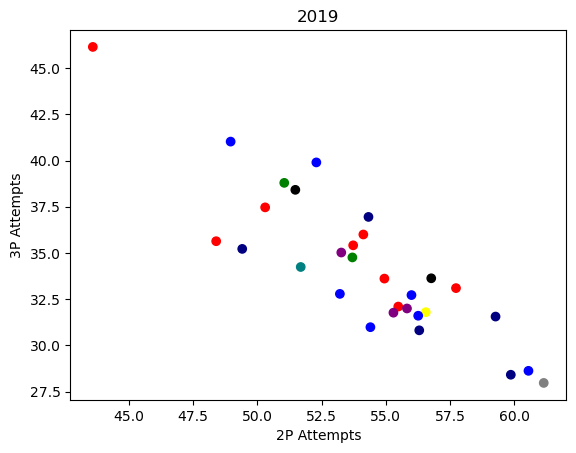

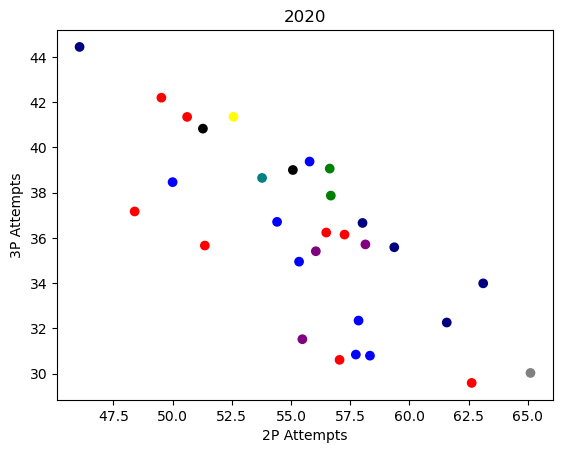

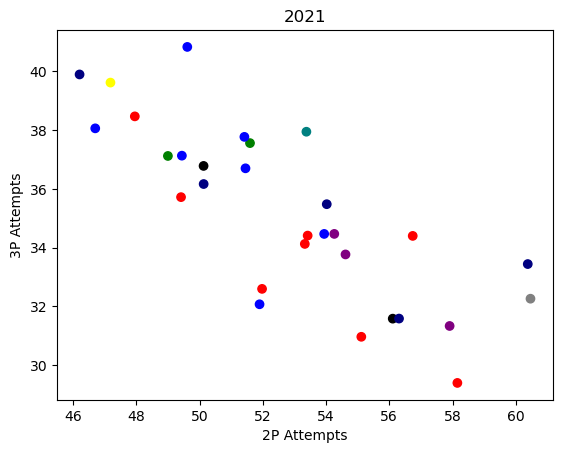

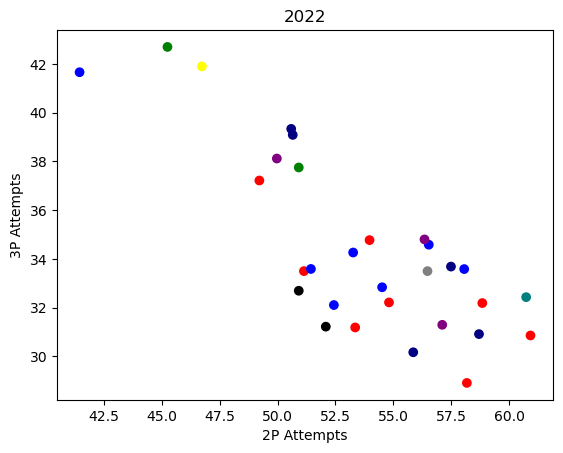

In [86]:
for year in years: #ploting for each year
    df_filtered = df_teams_years[df_teams_years['SEASON'] == year]
    plt.scatter(df_filtered['avg_FG2A'], df_filtered['avg_FG3A'], c = df_filtered['color'])
    plt.title(year)
    plt.xlabel('2P Attempts')
    plt.ylabel('3P Attempts')
    plt.show()
    

Very good but some improvements need to be added.

In [88]:
df_teams_years.describe() #finding the min and max to add the xlim and ylim

,SEASON,total_FGA,total_FG3A,n_games,total_FG2A,avg_FG2A,avg_FG3A
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000
mean,2012.515860,7378.911519,2043.984975,88.559265,5334.926544,60.085581,23.490965
std,5.762815,1211.075294,727.909690,14.943352,1028.079019,5.394808,8.106975
min,2003.000000,2891.000000,711.000000,34.000000,1451.000000,41.457143,8.267442
25%,2008.000000,7113.500000,1474.000000,87.000000,5046.000000,56.614826,17.196881
50%,2013.000000,7556.000000,1900.000000,90.000000,5565.000000,60.842593,21.500000
75%,2017.500000,7973.000000,2507.500000,95.000000,5901.500000,63.880208,30.212151
max,2022.000000,9763.000000,4377.000000,115.000000,7315.000000,74.359551,46.141304


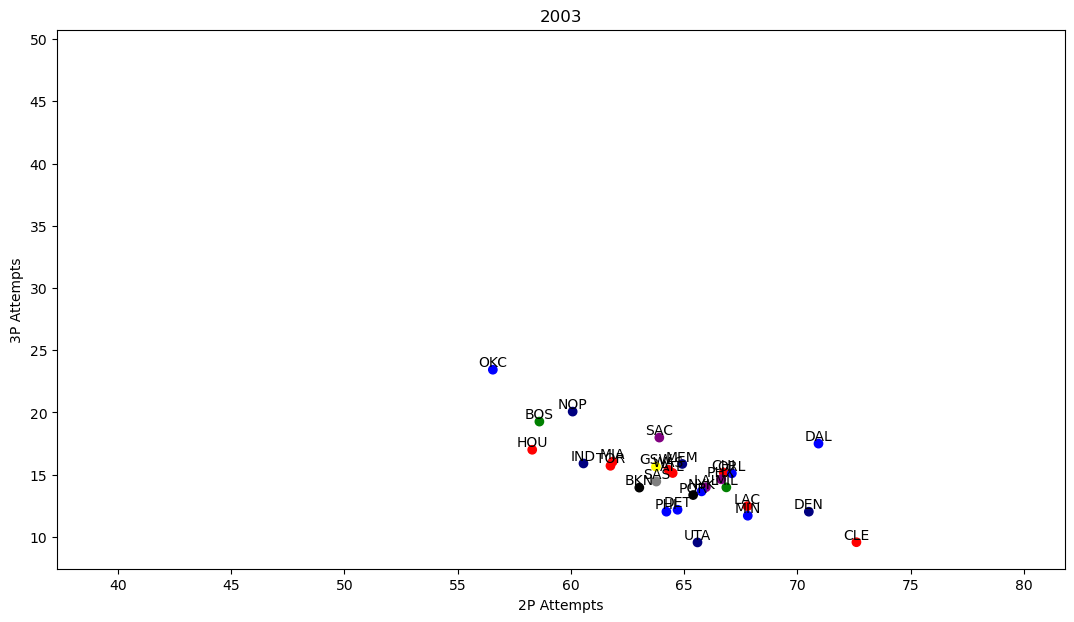

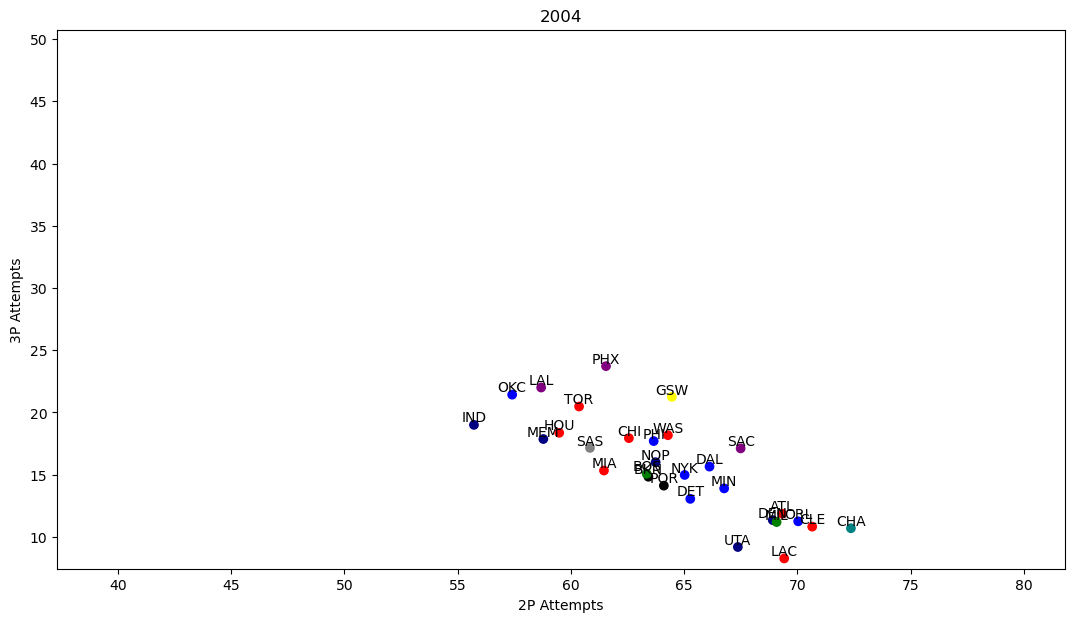

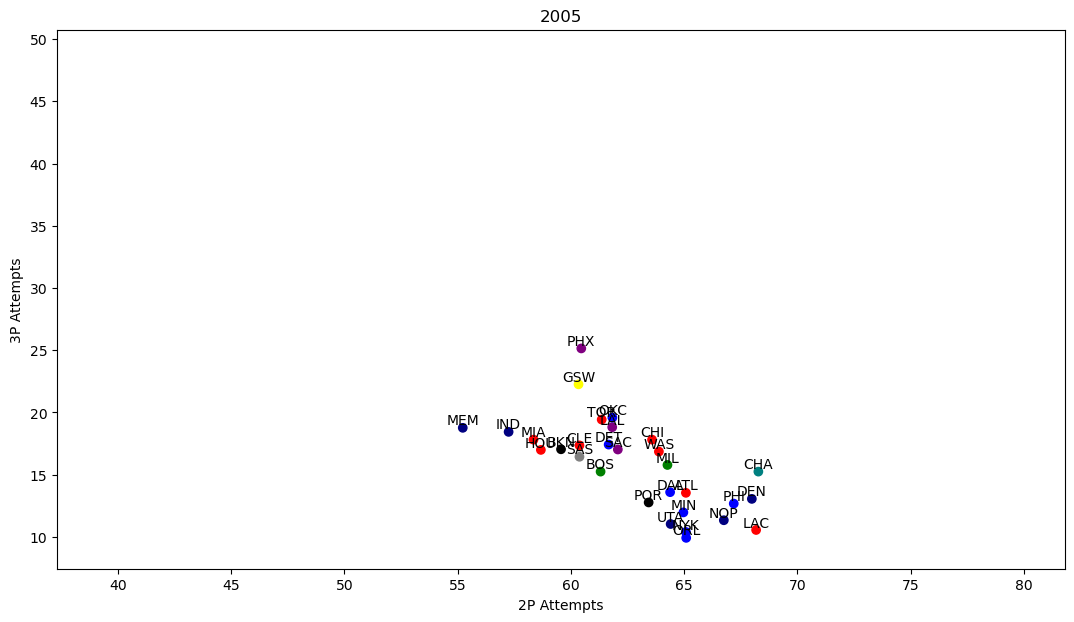

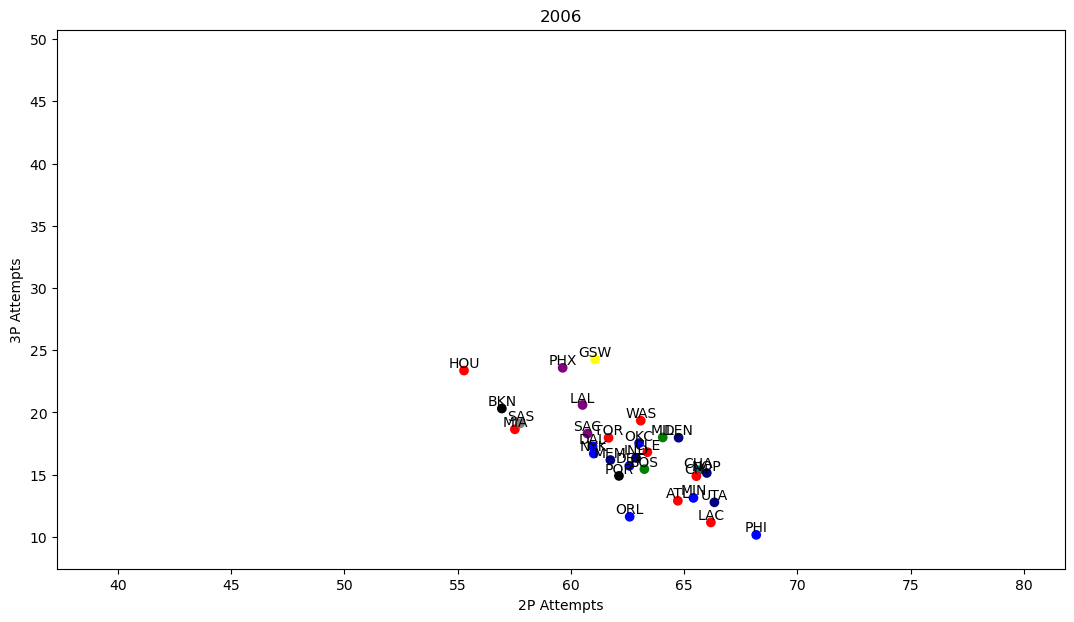

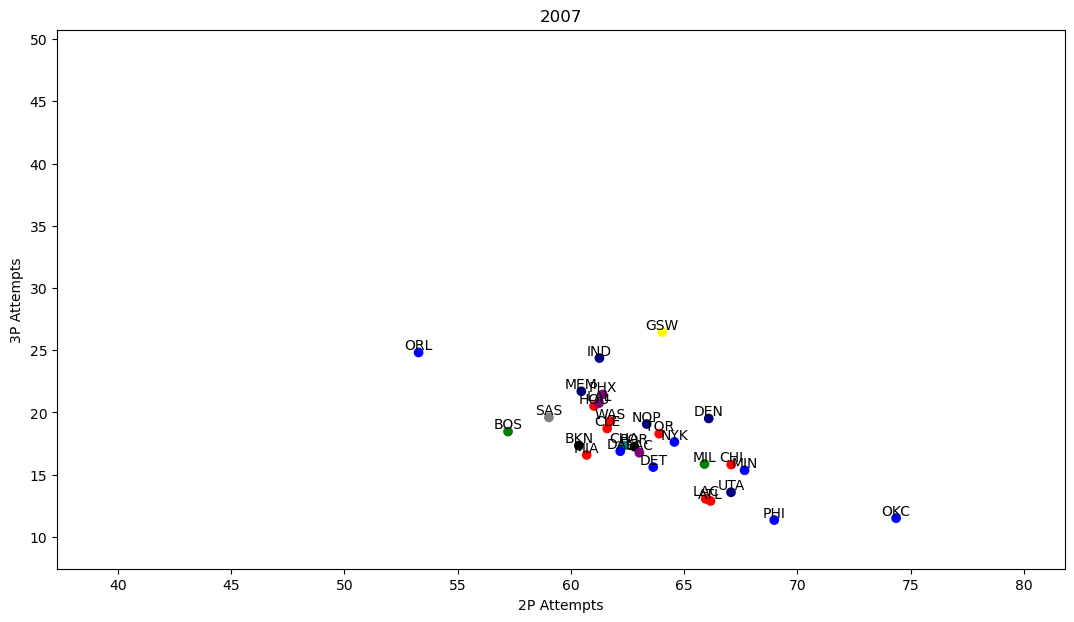

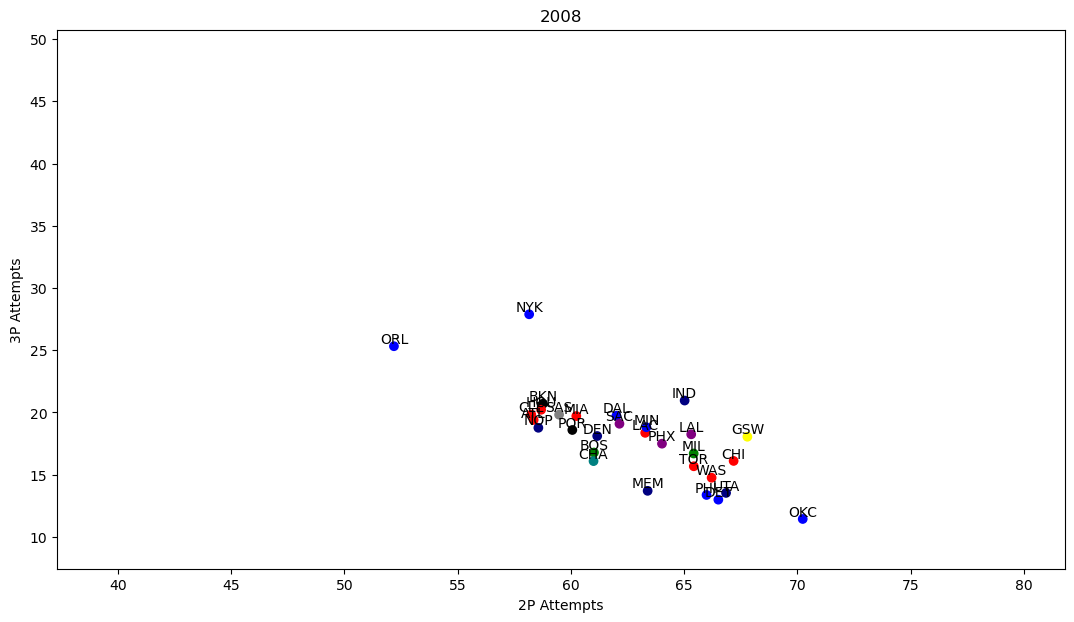

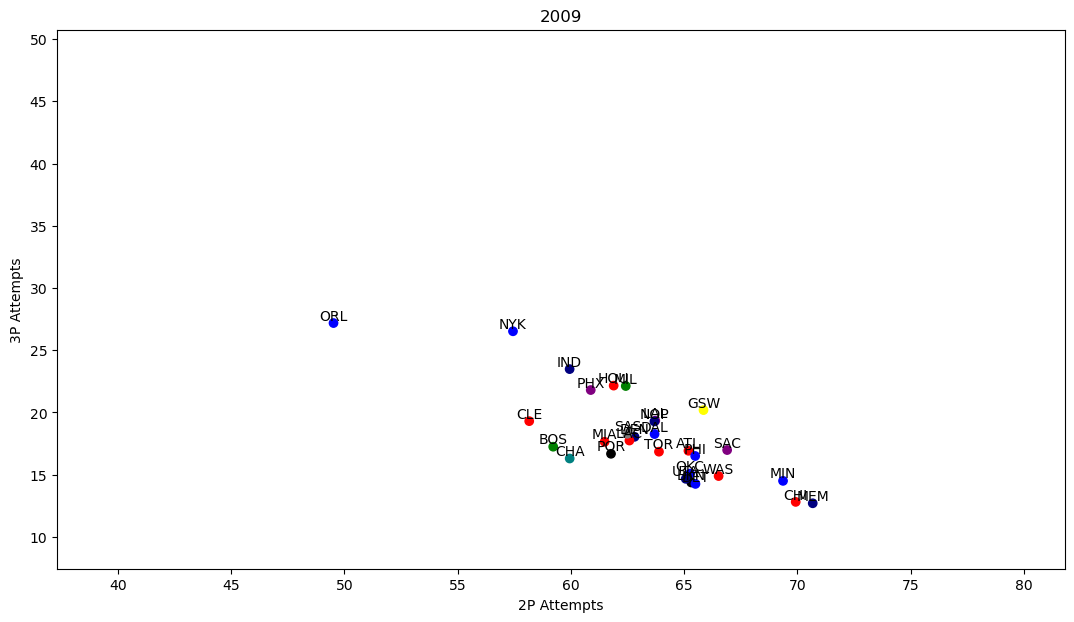

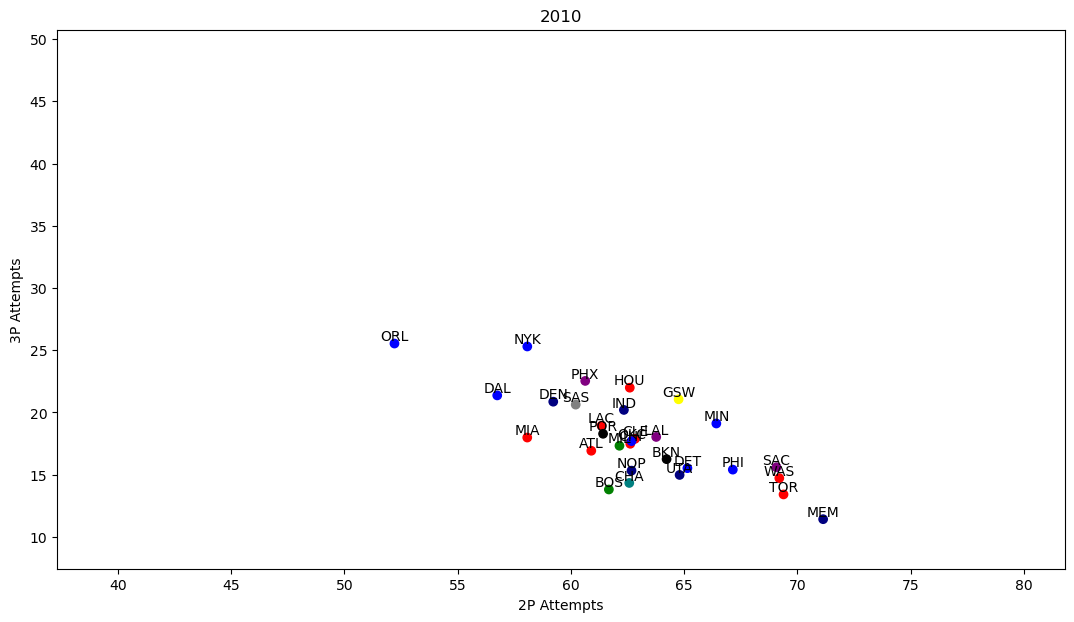

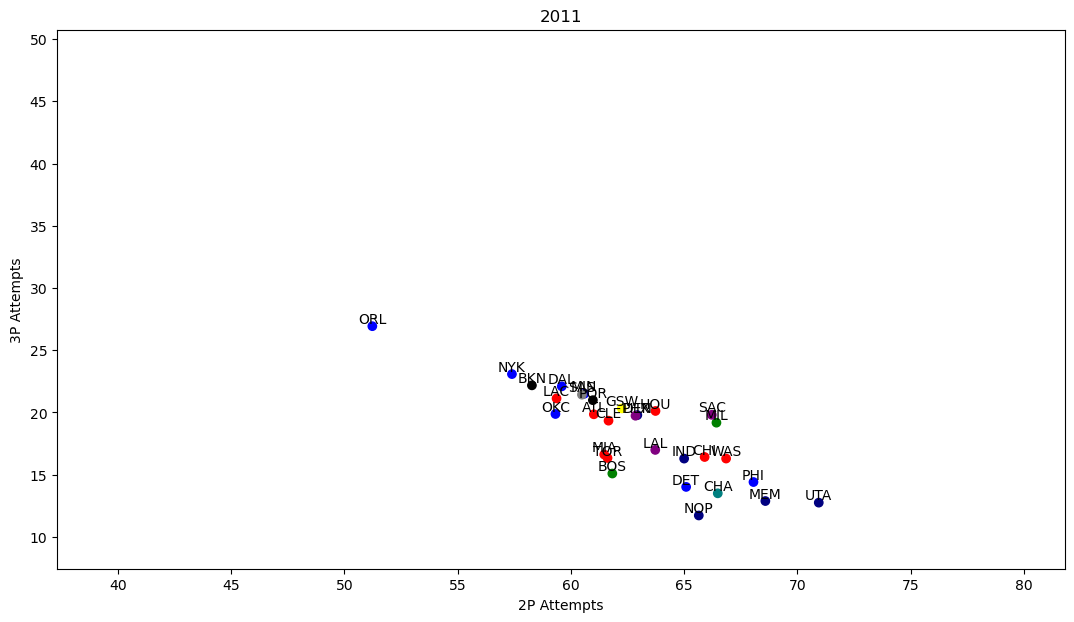

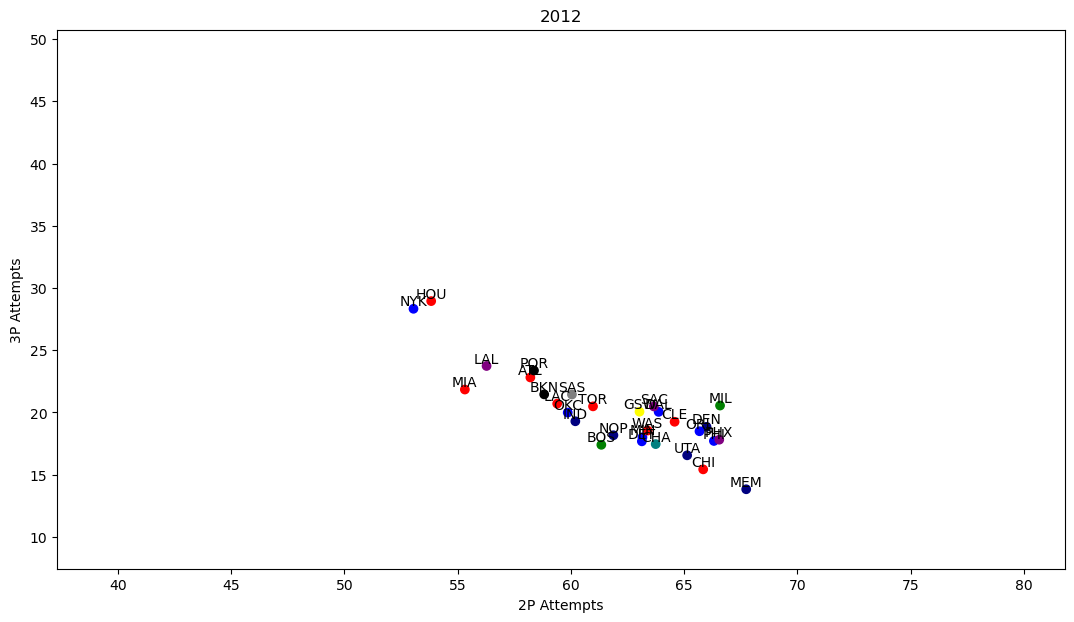

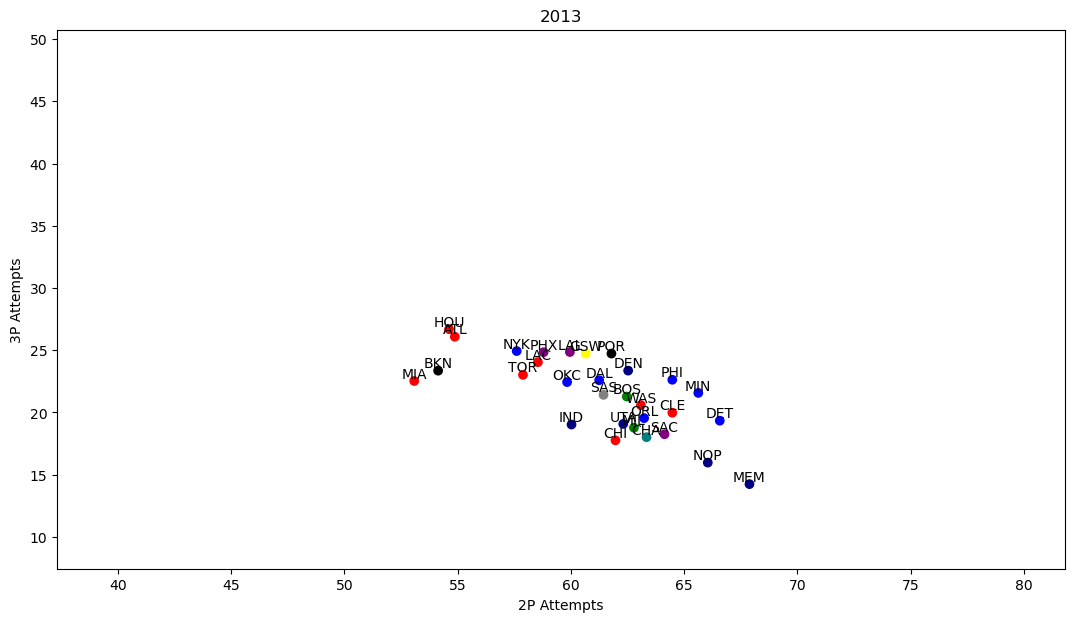

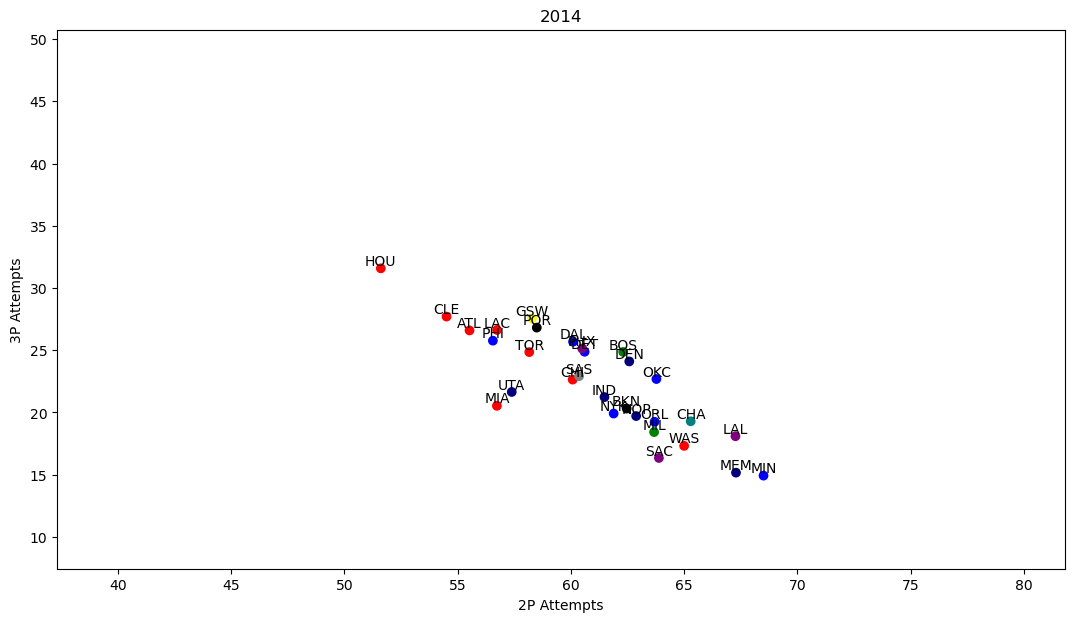

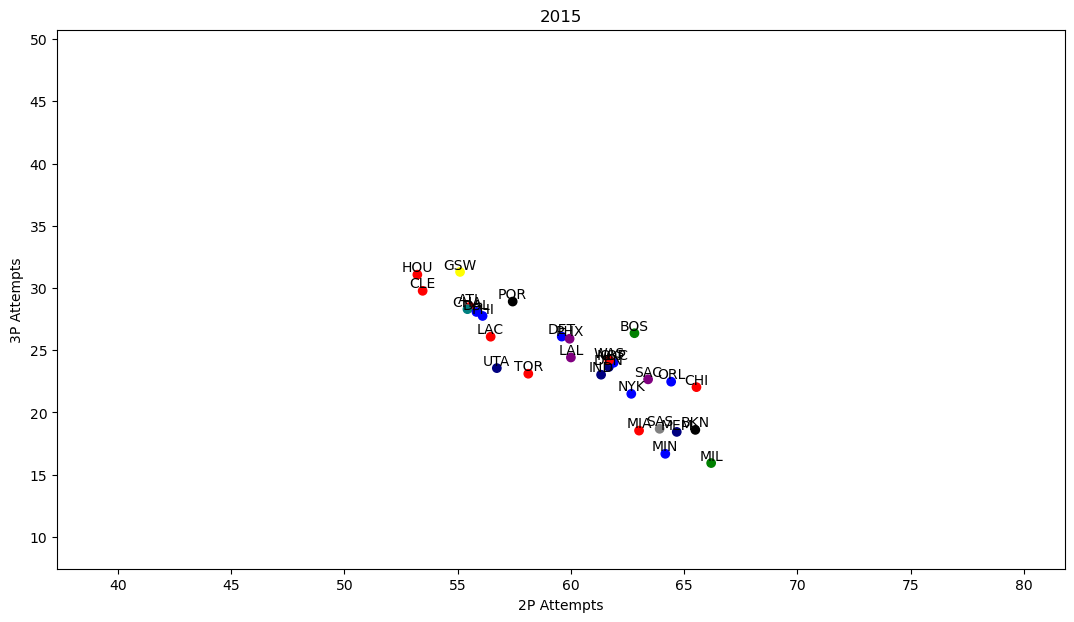

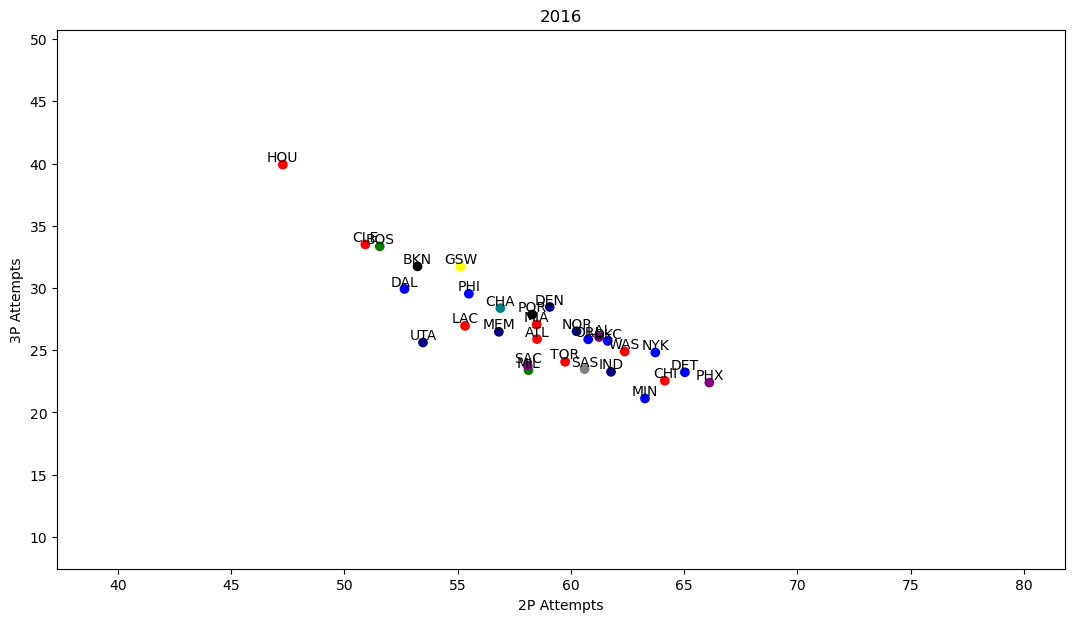

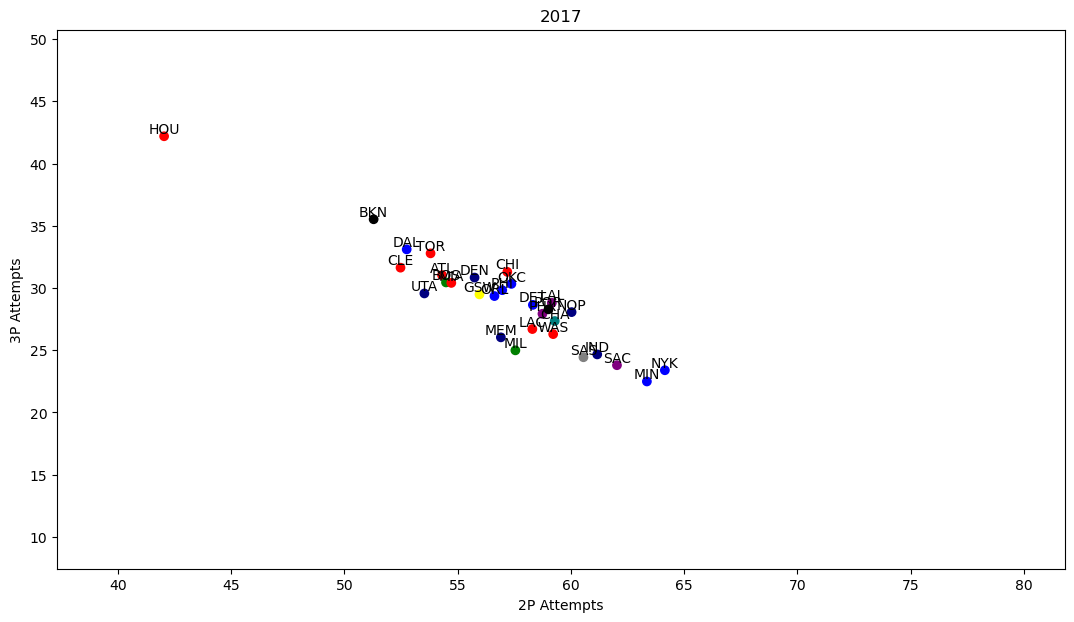

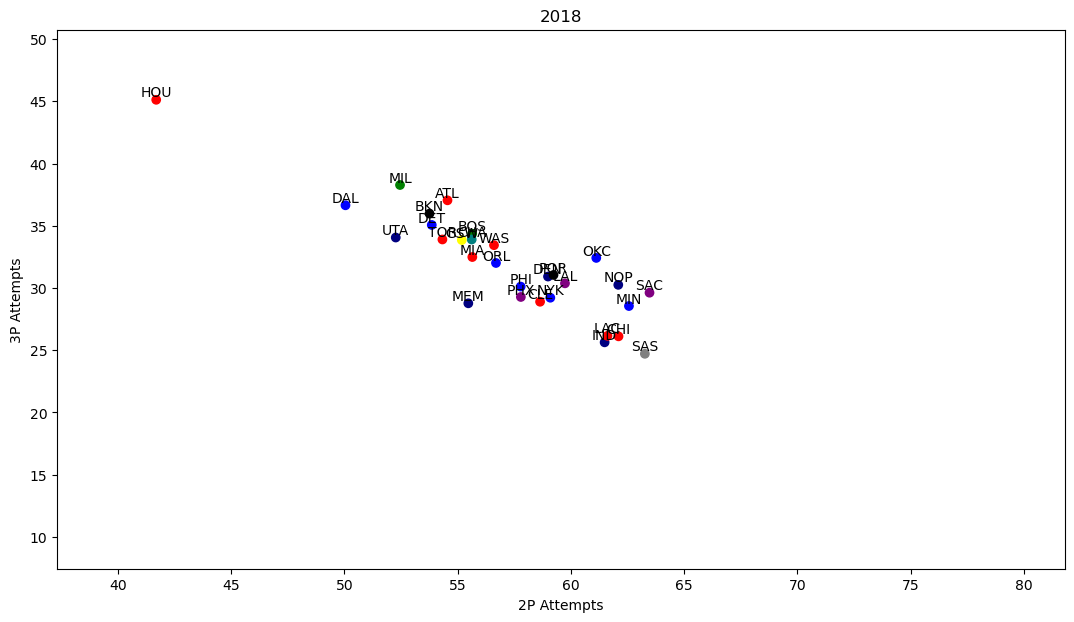

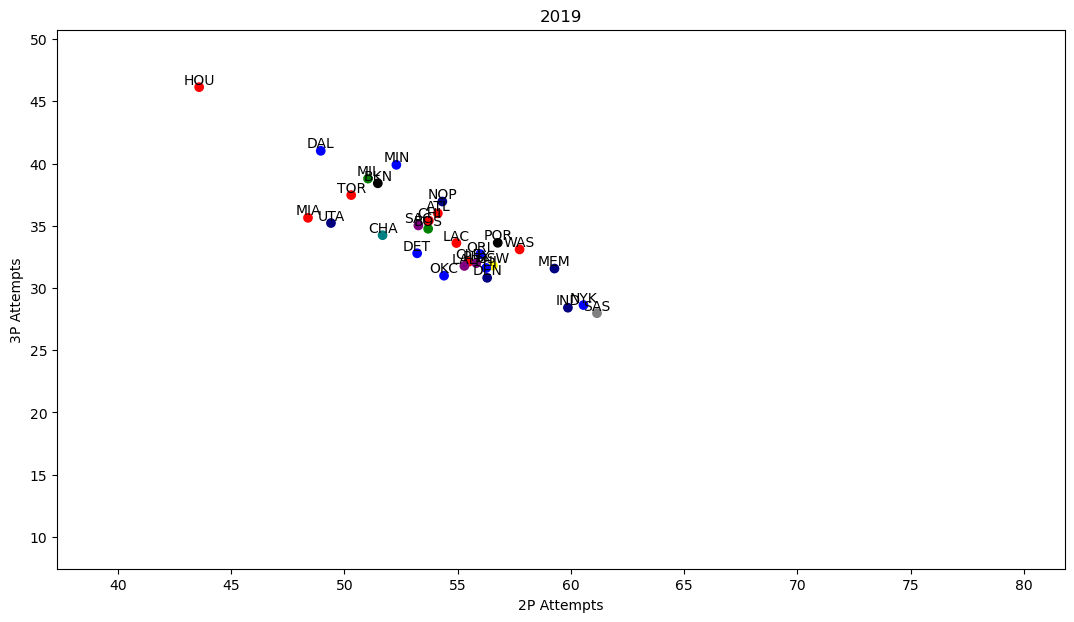

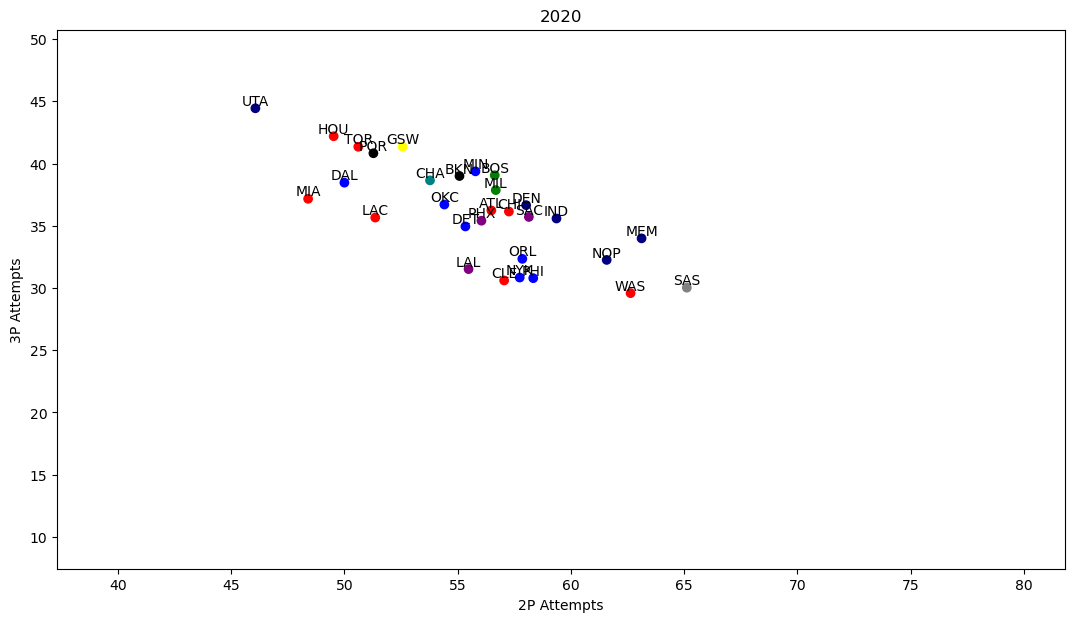

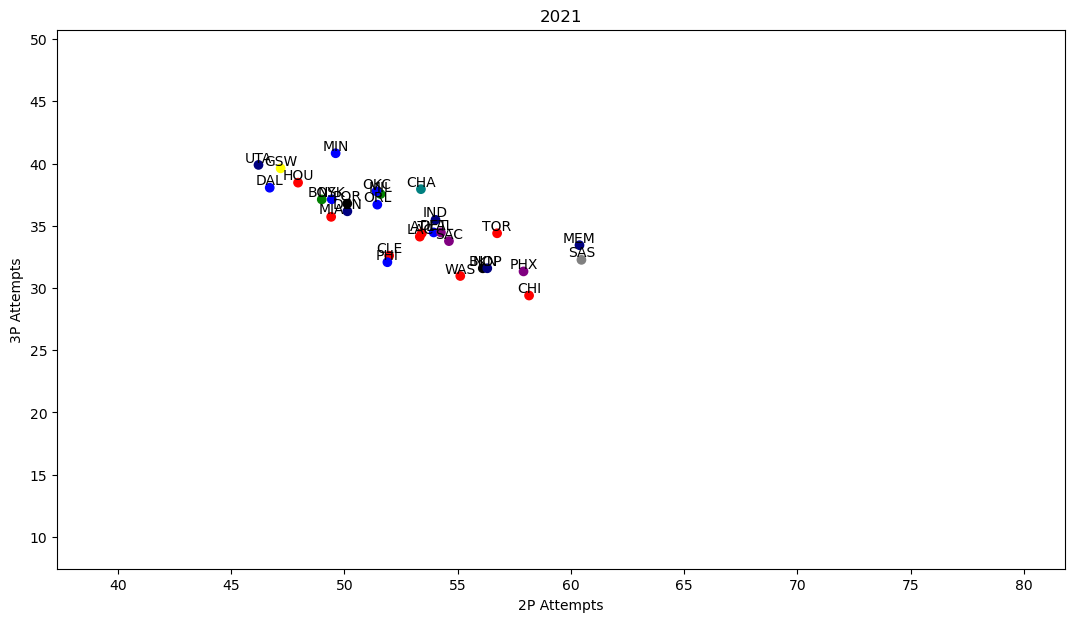

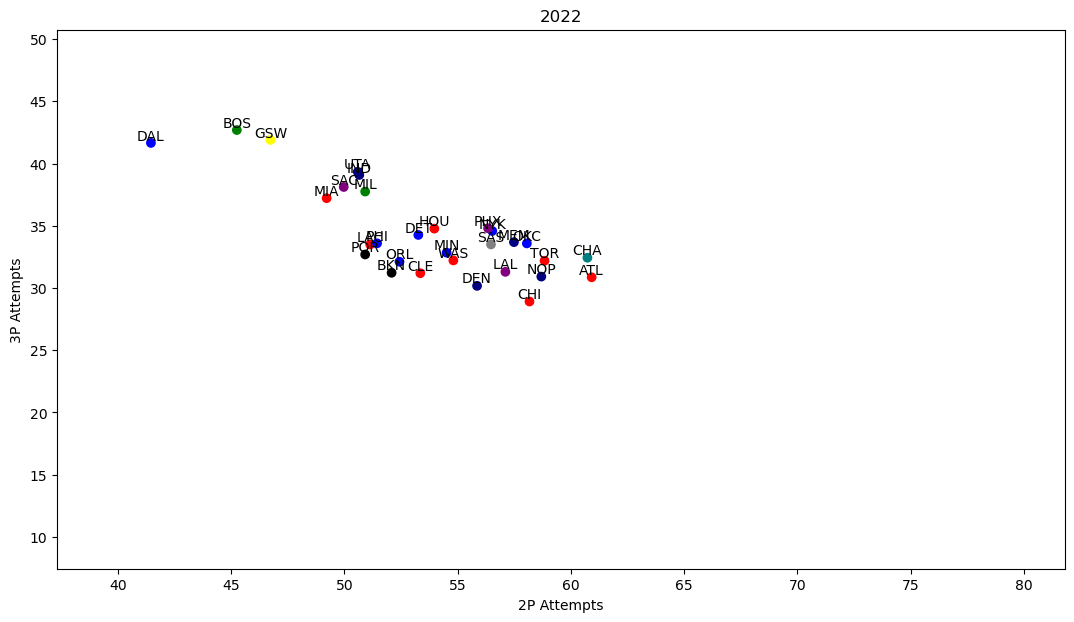

In [89]:
for year in years:
    fig = plt.figure(figsize=(13, 7))
    df_filtered = df_teams_years[df_teams_years['SEASON'] == year]
    plt.scatter(df_filtered['avg_FG2A'], df_filtered['avg_FG3A'], c=df_filtered['color'])
    plt.title(year)
    plt.xlabel('2P Attempts')
    plt.ylabel('3P Attempts')
    plt.xlim(df_teams_years['avg_FG2A'].min()*0.9, df_teams_years['avg_FG2A'].max()*1.1) #adding the limitations of the axes
    plt.ylim(df_teams_years['avg_FG3A'].min()*0.9, df_teams_years['avg_FG3A'].max()*1.1)
    # Add labels for each team
    for i, row in df_filtered.iterrows():
        plt.text(row['avg_FG2A'], row['avg_FG3A'], row['ABBREVIATION'], ha='center', va='bottom')

    plt.show()


fixing the labels a little bit:

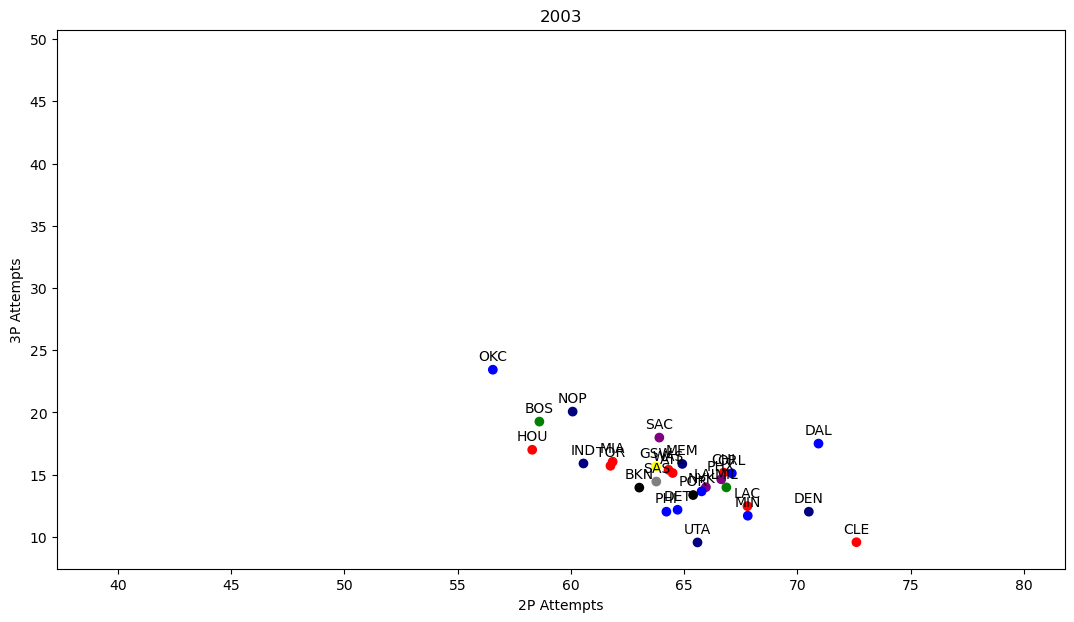

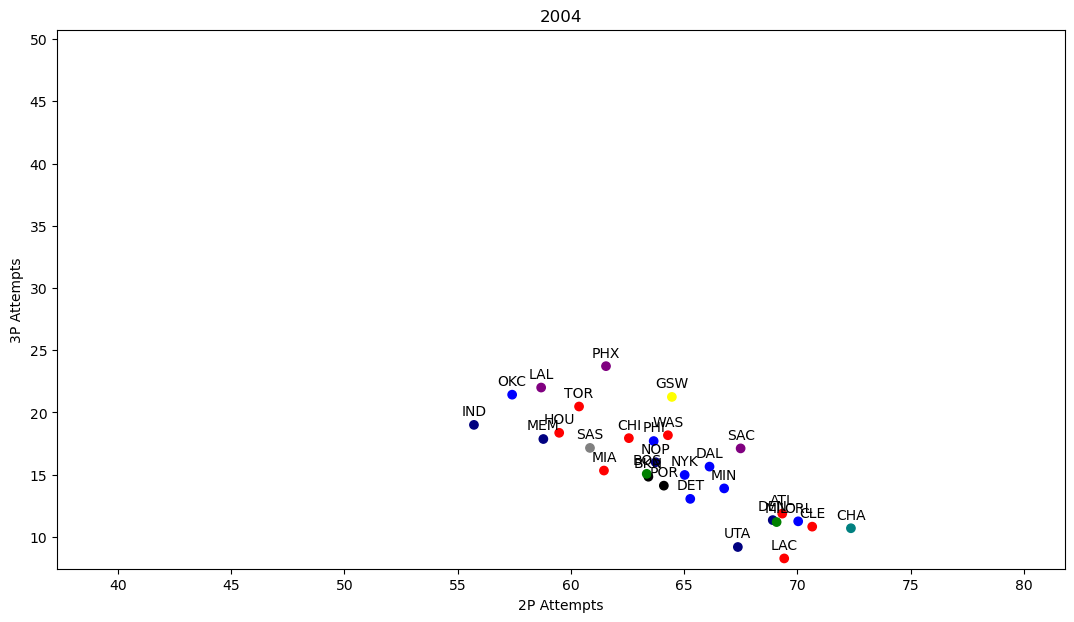

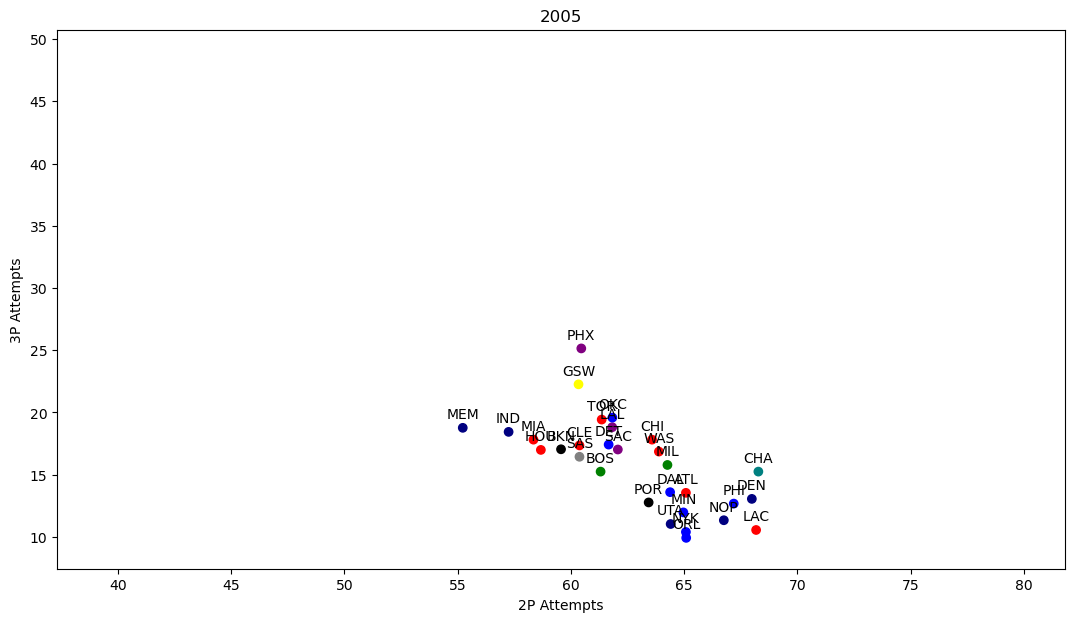

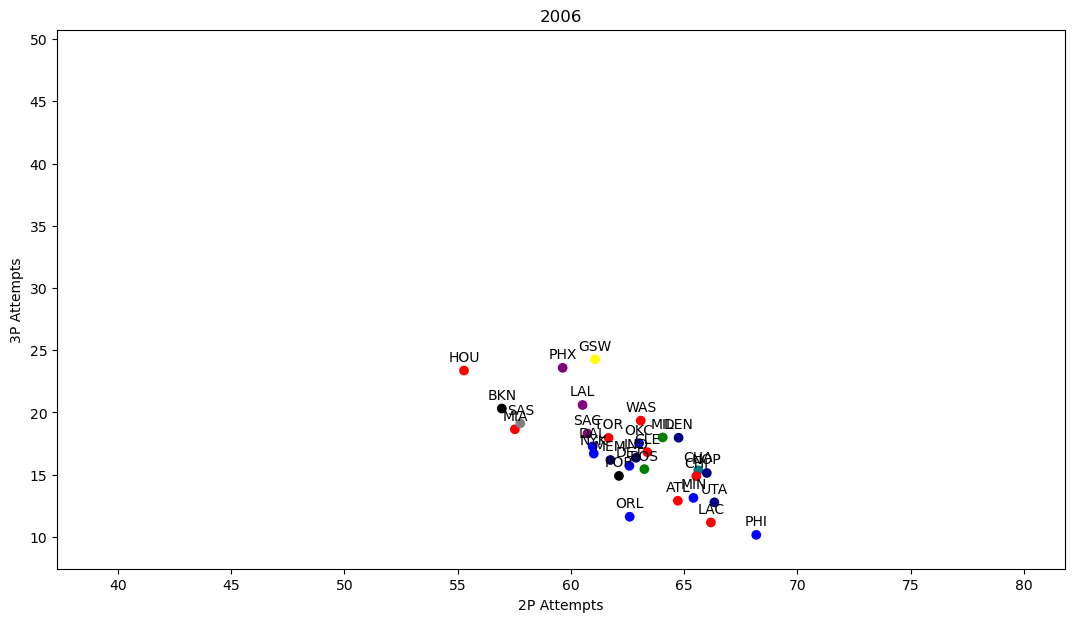

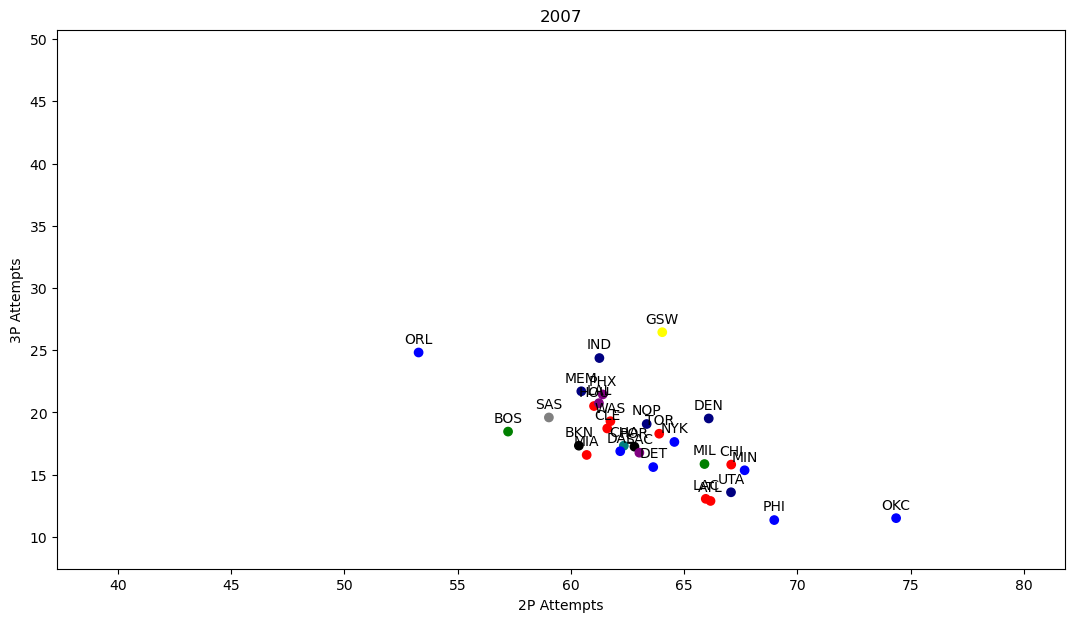

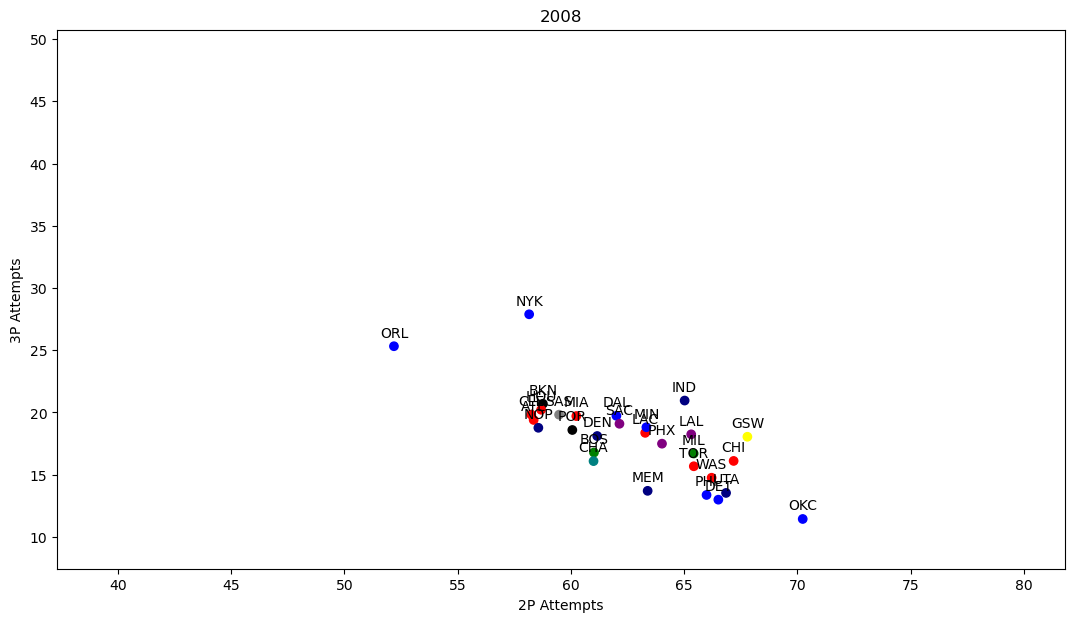

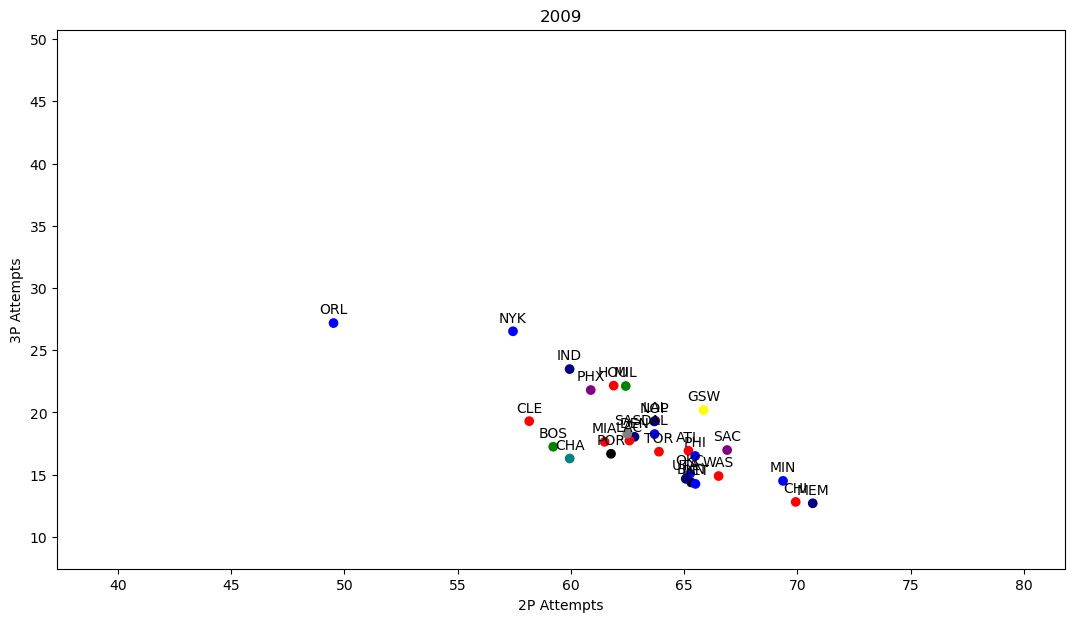

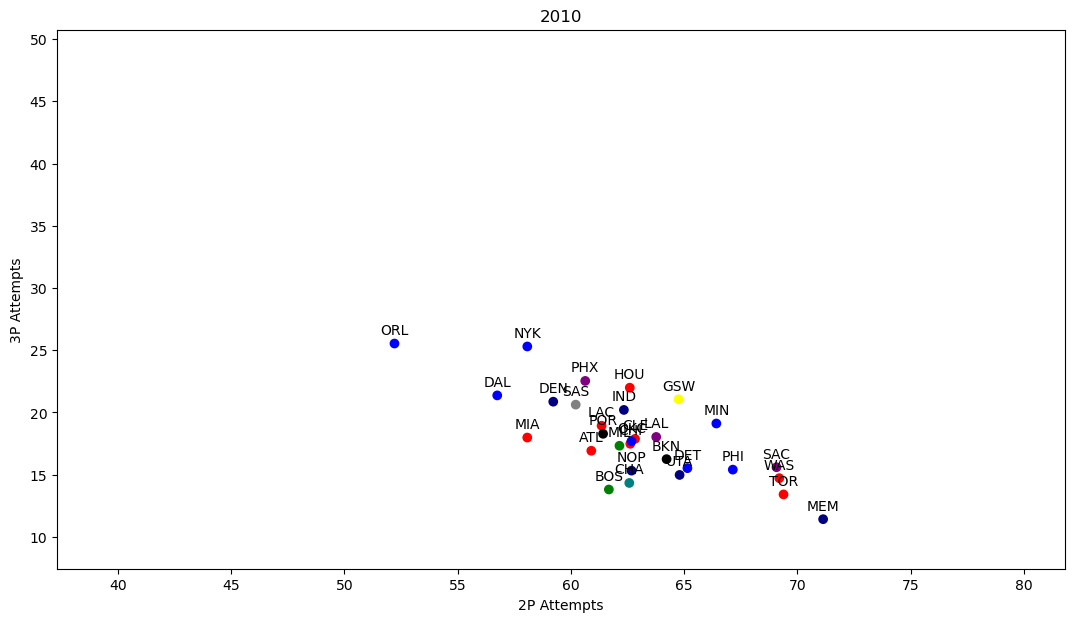

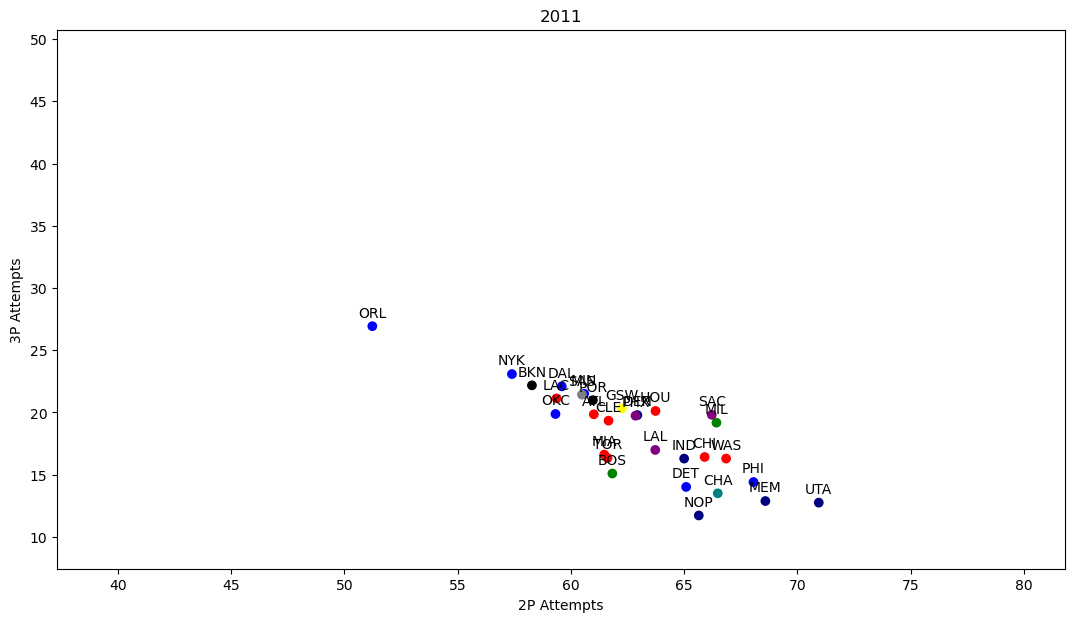

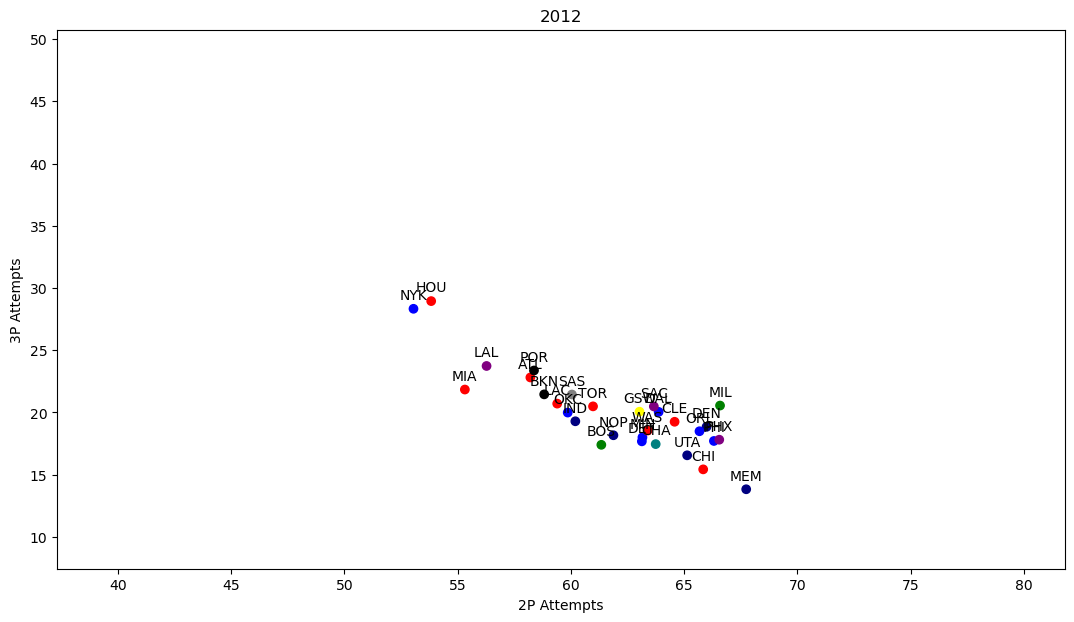

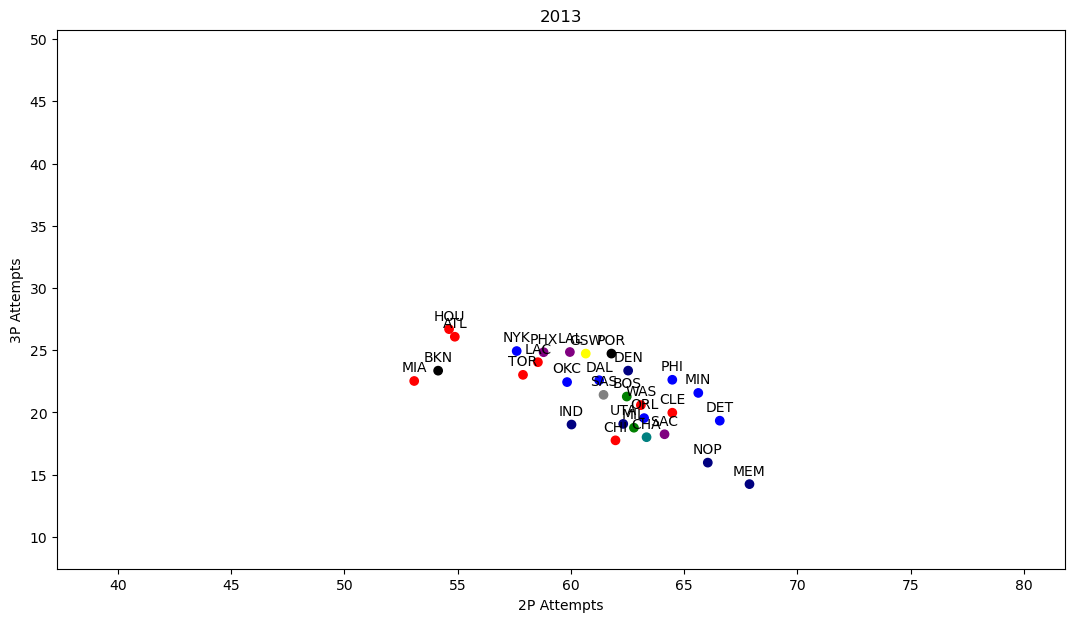

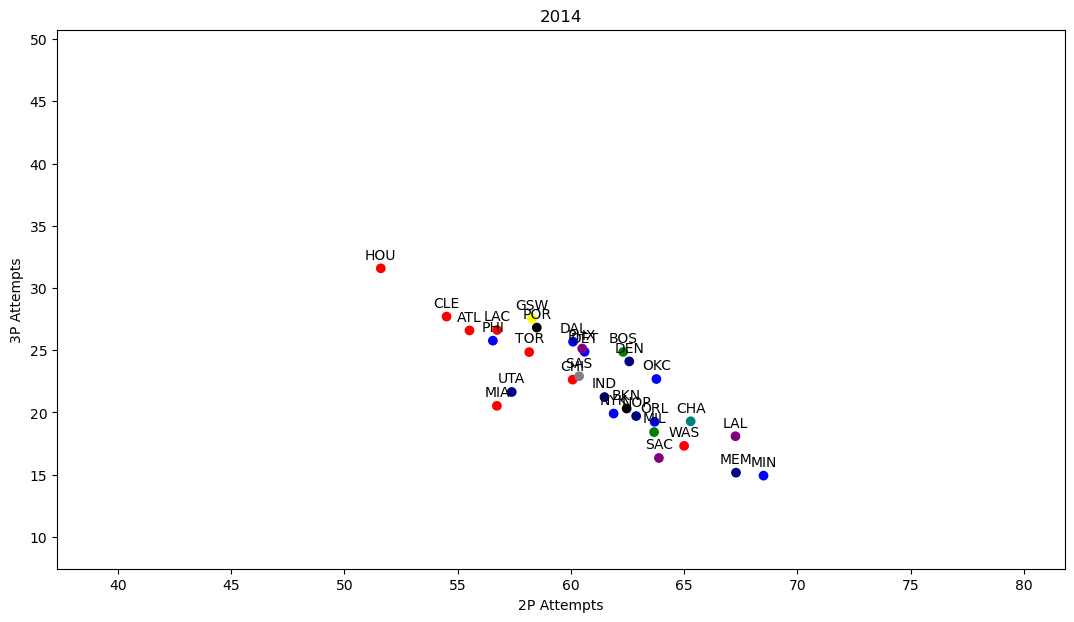

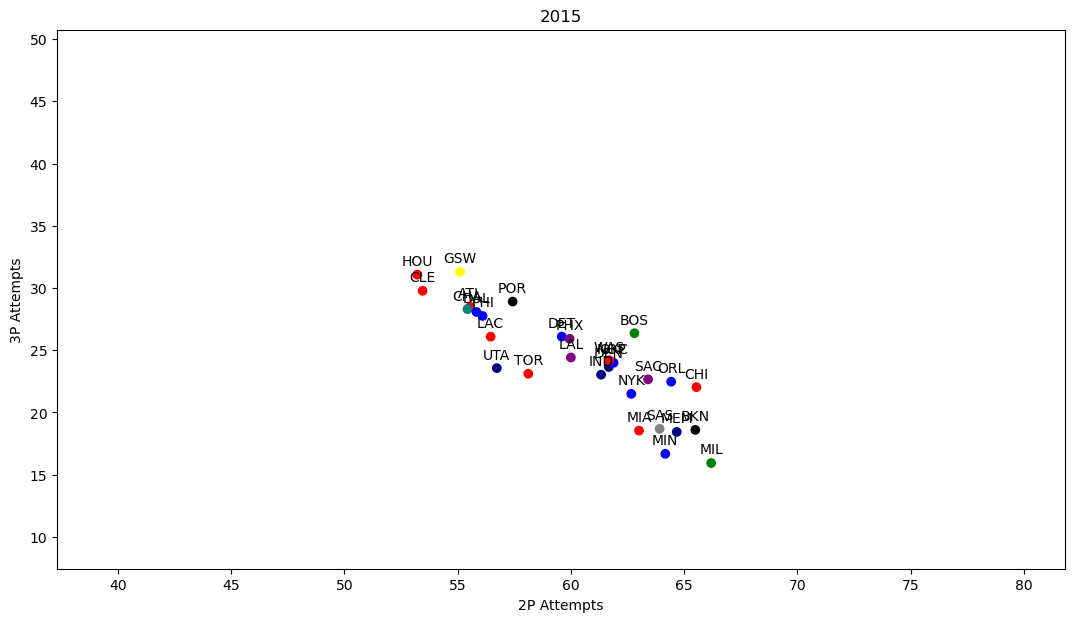

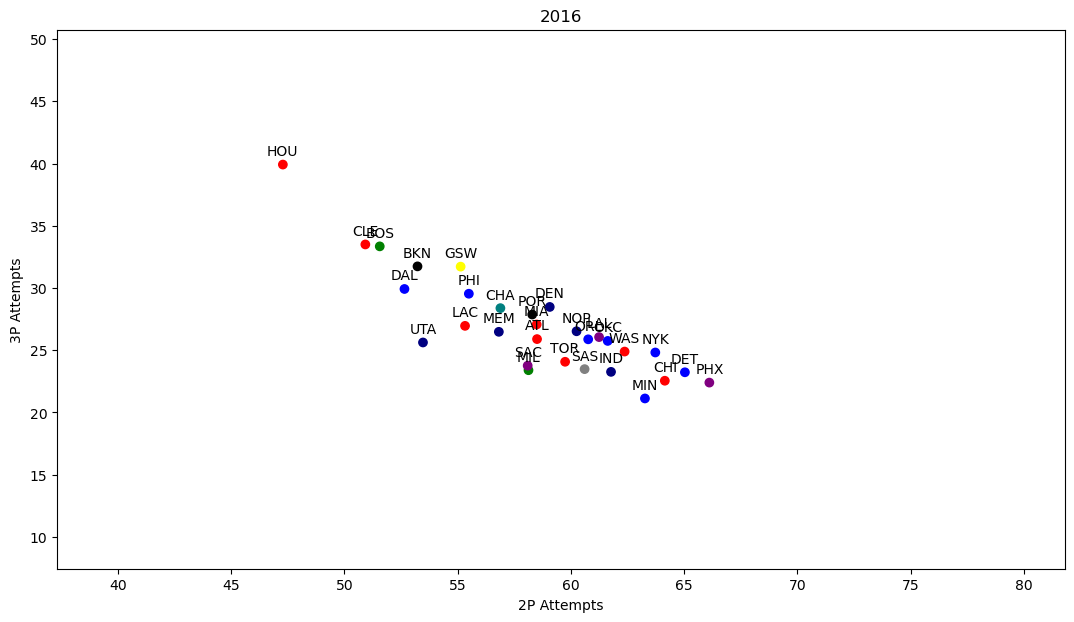

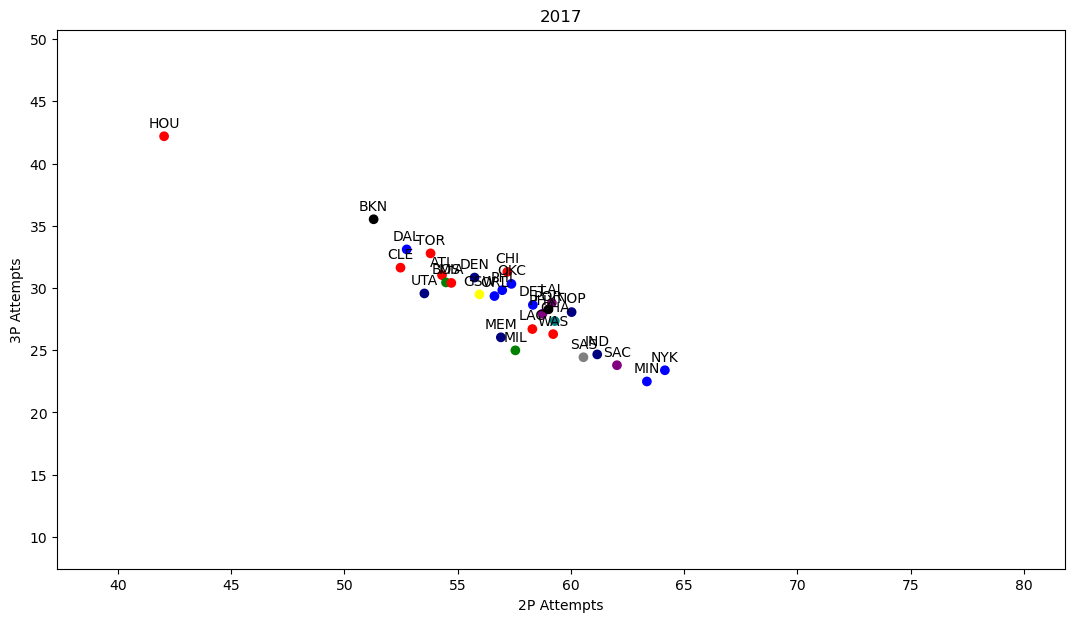

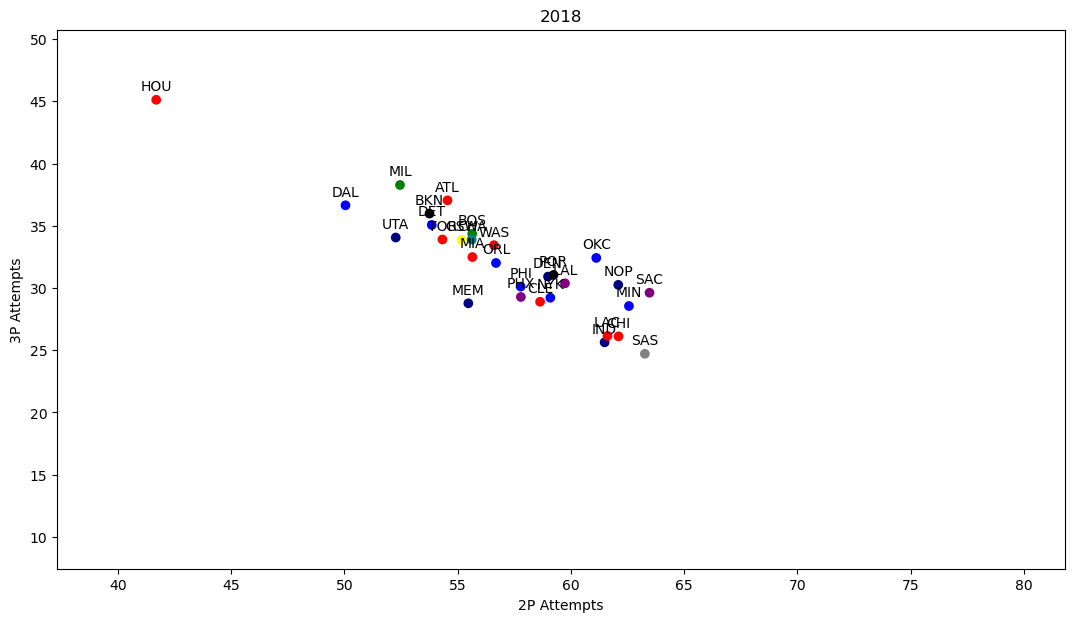

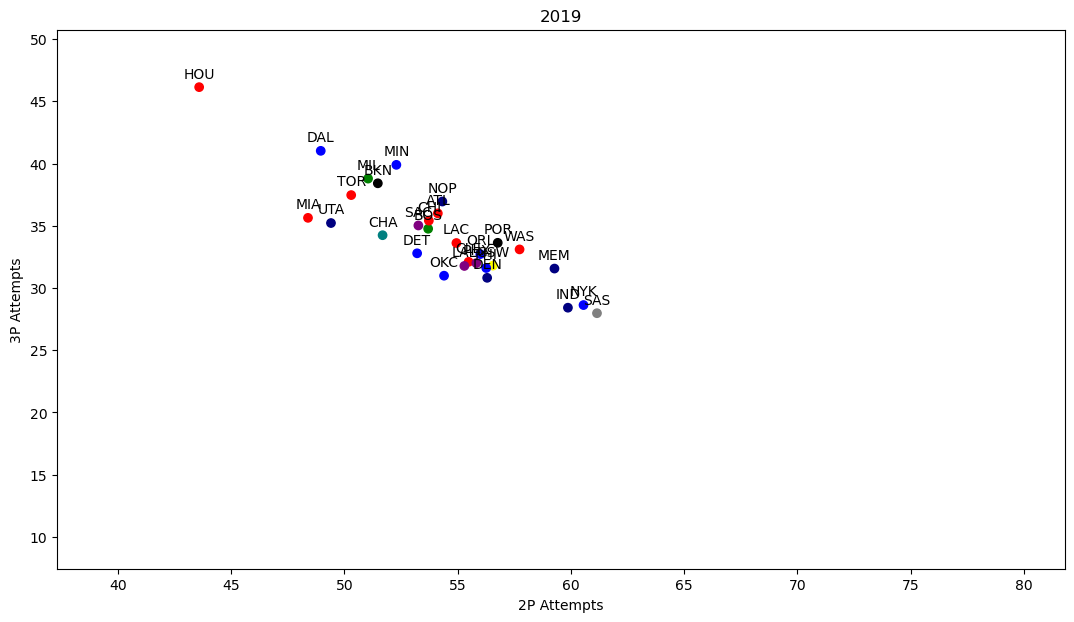

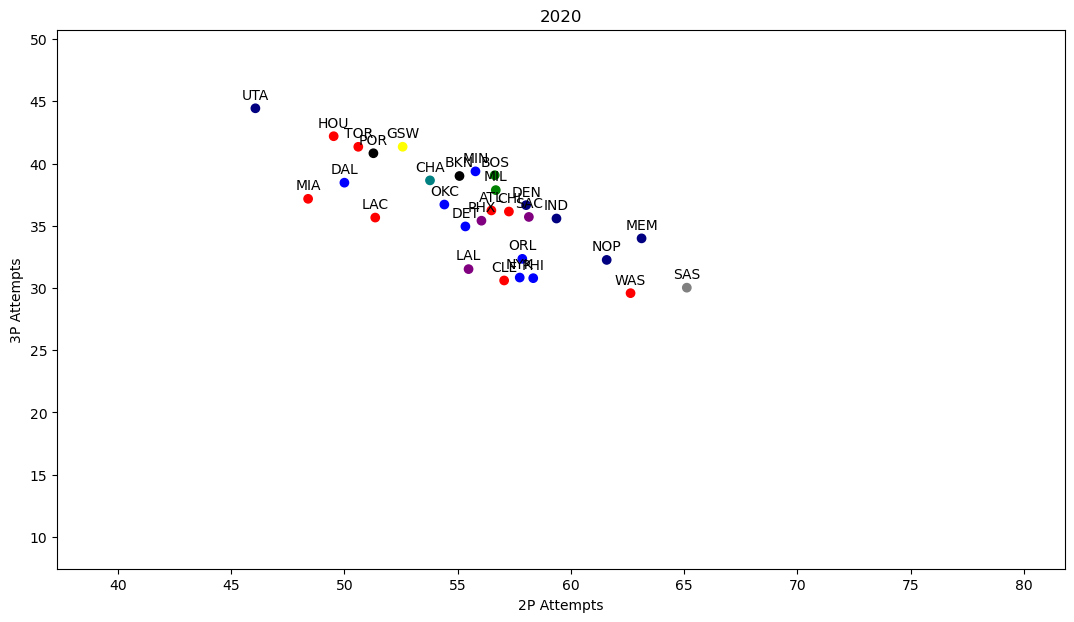

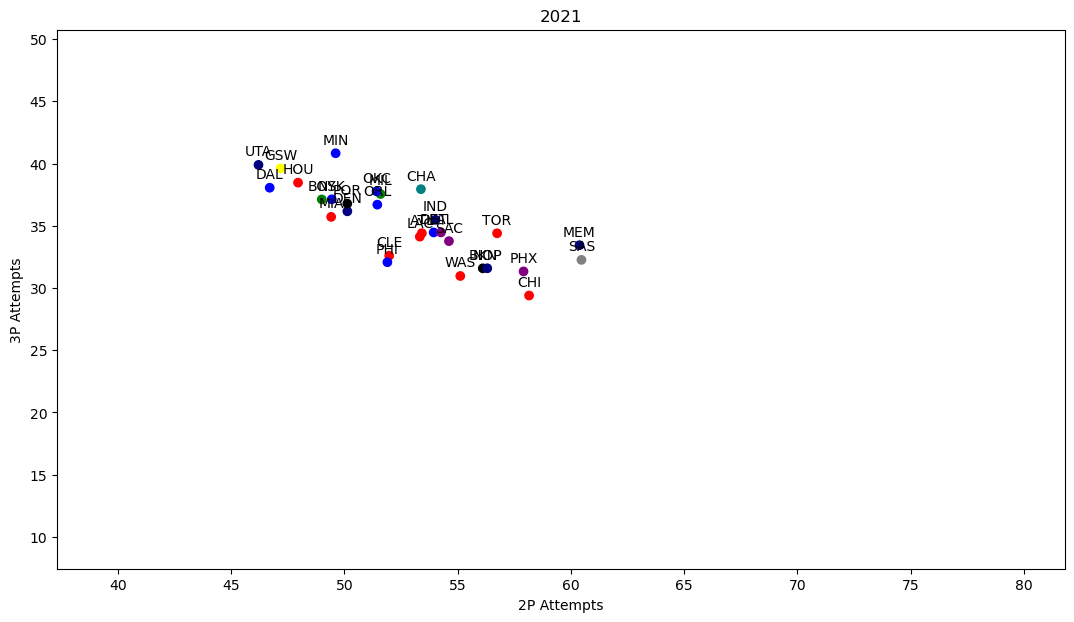

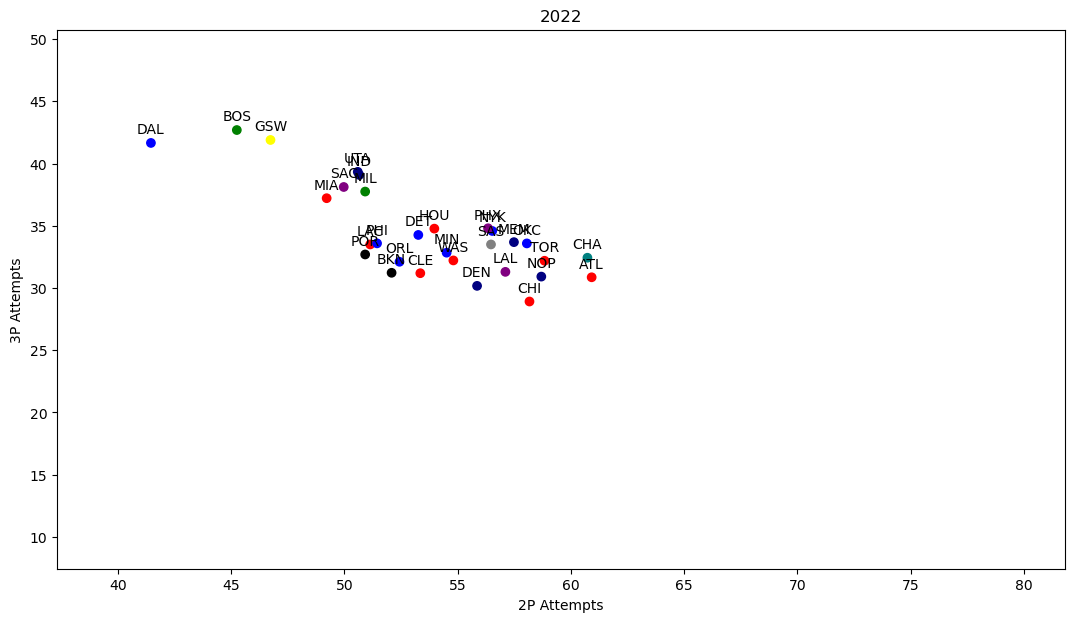

In [90]:
for year in years:
    fig = plt.figure(figsize=(13, 7))
    df_filtered = df_teams_years[df_teams_years['SEASON'] == year]
    plt.scatter(df_filtered['avg_FG2A'], df_filtered['avg_FG3A'], c=df_filtered['color'])
    plt.title(year)
    plt.xlabel('2P Attempts')
    plt.ylabel('3P Attempts')
    plt.xlim(df_teams_years['avg_FG2A'].min() * 0.9, df_teams_years['avg_FG2A'].max() * 1.1)
    plt.ylim(df_teams_years['avg_FG3A'].min() * 0.9, df_teams_years['avg_FG3A'].max() * 1.1)

    # Add labels for each team with raised position
    for i, row in df_filtered.iterrows():
        plt.text(row['avg_FG2A'], row['avg_FG3A'] + 0.5, row['ABBREVIATION'], ha='center', va='bottom')

    plt.show()


And creating the coolest gif with a little help from chat GPT:

In [93]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from PIL import Image

# Create a list to store each plot image
plot_images = []

# Generate plots for each year and save them as images
for year in years:
    fig = plt.figure(figsize=(13, 7))
    df_filtered = df_teams_years[df_teams_years['SEASON'] == year]
    plt.scatter(df_filtered['avg_FG2A'], df_filtered['avg_FG3A'], c=df_filtered['color'])
    plt.title(year)
    plt.xlabel('Avg 2P Attempts per game')
    plt.ylabel('Avg 3P Attempts per game')
    plt.xlim(df_teams_years['avg_FG2A'].min()*0.9, df_teams_years['avg_FG2A'].max()*1.1)
    plt.ylim(df_teams_years['avg_FG3A'].min()*0.9, df_teams_years['avg_FG3A'].max()*1.1)
    
    for i, row in df_filtered.iterrows():
        plt.text(row['avg_FG2A'], row['avg_FG3A'] + 0.5, row['ABBREVIATION'], ha='center', va='bottom')

    # Save the current plot as an image
    filename = f"plot_{year}.png"
    plt.savefig(filename)
    plot_images.append(Image.open(filename))
    plt.close()

# Create the GIF animation
plot_images[0].save('plot_animation_avg.gif', save_all=True, append_images=plot_images[1:], duration=2000, loop=0)
